Double Play Analytics

(1) Forecast the outcome of games; (2) understand the most important factors that influence the outcome of games.

- Most important factors of a win? 
    - Pitching (start), pitching (reliever/closer), defense, runs/hitting (consistent), homeruns, the park, OBP, other?
    - run consistency - can you get at least 3 runs per game x percent of the time?


In [1]:
# Bringing in packages for EDA, pre-processing, modeling, and visualizations
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix, recall_score


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import transforms


In [2]:
#! pip install numpy==1.18.5

In [3]:
#import numpy as np


#print(np.__version__)


In [4]:
#pip show numpy

In [5]:
#pip install --force-reinstall numpy

In [6]:
#rm -rf C:\Users\monic\anaconda3\envs\learn-env\Lib\site-packages\~umpy

In [7]:
#pip install --upgrade numpy

In [8]:
#pip install matplotlib==3.4.3 pandas==1.3.3 seaborn==0.11.2

In [9]:
#pip list


#### Create a single dataset

In [10]:
#Each year is saved in a separate .txt file
file_paths = ["data/gl2010.txt", "data/gl2011.txt", "data/gl2012.txt", "data/gl2013.txt", "data/gl2014.txt",
              "data/gl2015.txt", "data/gl2016.txt", "data/gl2017.txt", "data/gl2018.txt", "data/gl2019.txt",
              "data/gl2020.txt", "data/gl2021.txt", "data/gl2022.txt", "data/gl2023.txt"]

In [11]:
dfs=[]

In [12]:
for file_path in file_paths:
    with open(file_path, "r") as f:
        # Read lines from the file
        data = f.readlines()
        # Split each line by comma and create a list of lists
        data_split = [line.strip().split(",") for line in data]
        # Create DataFrame from the data
        df_initial = pd.DataFrame(data_split)
        # Append DataFrame to the list
        dfs.append(df_initial)

In [13]:
# Concatenate all DataFrames in the list
df = pd.concat(dfs, ignore_index=True)

#### Understand what the data look like

In [14]:

# Set the display width to accommodate more characters per row
pd.set_option('display.width', 1000)  # Adjust as needed

# Set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the head of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32484 entries, 0 to 32483
Columns: 179 entries, 0 to 178
dtypes: object(179)
memory usage: 44.4+ MB


In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178
0,"""20100404""","""0""","""Sun""","""NYA""","""AL""",1,"""BOS""","""AL""",1,7,9,51,"""N""","""""","""""","""""","""BOS07""",37440,226,"""020300200""","""01001331x""",37,12,2,0,2,6,0,0,0,6,0,2,2,0,2,0,9,5,8,8,1,0,24,9,1,1,1,0,34,12,3,1,1,8,0,1,0,4,0,5,0,0,0,0,6,6,7,7,1,0,27,15,0,0,2,0,"""westj901""","""Joe West""","""herna901""","""Angel Hernandez""","""schrp901""","""Paul Schrieber""","""drakr901""","""Rob Drake""","""""","""(none)""","""""","""(none)""","""giraj001""","""Joe Girardi""","""frant001""","""Terry Francona""","""okajh001""","""Hideki Okajima""","""parkc002""","""Chan Ho Park""","""papej001""","""Jonathan Papelbon""","""""","""(none)""","""sabac001""","""CC Sabathia""","""beckj002""","""Josh Beckett""","""jeted001""","""Derek Jeter""",6,"""johnn001""","""Nick Johnson""",10,"""teixm001""","""Mark Teixeira""",3,"""rodra001""","""Alex Rodriguez""",5,"""canor001""","""Robinson Cano""",4,"""posaj001""","""Jorge Posada""",2,"""granc001""","""Curtis Granderson""",8,"""swisn001""","""Nick Swisher""",9,"""gardb001""","""Brett Gardner""",7,"""ellsj001""","""Jacoby Ellsbury""",7,"""pedrd001""","""Dustin Pedroia""",4,"""martv001""","""Victor Martinez""",2,"""youkk001""","""Kevin Youkilis""",3,"""ortid001""","""David Ortiz""",10,"""belta001""","""Adrian Beltre""",5,"""drewj001""","""J.D. Drew""",9,"""camem001""","""Mike Cameron""",8,"""scutm001""","""Marco Scutaro""",6,"""""","""Y""",None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
1,"""20100405""","""0""","""Mon""","""MIN""","""AL""",1,"""ANA""","""AL""",1,3,6,51,"""N""","""""","""""","""""","""ANA01""",43504,180,"""020010000""","""21001002x""",32,7,1,0,1,3,0,1,1,3,0,8,1,0,1,0,7,4,6,6,1,0,24,4,0,0,0,0,33,9,0,0,3,6,0,0,0,3,0,5,1,0,0,0,6,4,3,3,0,0,27,10,0,0,1,0,"""mcclt901""","""Tim McClelland""","""everm901""","""Mike Everitt""","""fleta901""","""Andy Fletcher""","""johna901""","""Adrian Johnson""","""""","""(none)""","""""","""(none)""","""gardr001""","""Ron Gardenhire""","""sciom001""","""Mike Scioscia""","""weavj003""","""Jered Weaver""","""bakes002""","""Scott Baker""","""fuenb001""","""Brian Fuentes""","""matsh001""","""Hideki Matsui""","""bakes002""","""Scott Baker""","""weavj003""","""Jered Weaver""","""spand001""","""Denard Span""",8,"""hudso001""","""Orlando Hudson""",4,"""mauej001""","""Joe Mauer""",2,"""mornj001""","""Justin Morneau""",3,"""cuddm001""","""Michael Cuddyer""",9,"""kubej002""","""Jason Kubel""",10,"""yound003""","""Delmon Young""",7,"""hardj003""","""J.J. Hardy""",6,"""puntn001""","""Nick Punto""",5,"""aybae001""","""Erick Aybar""",6,"""abreb001""","""Bobby Abreu""",9,"""huntt001""","""Torii Hunter""",8,"""matsh001""","""Hideki Matsui""",10,"""morak001""","""Kendrys Morales""",3,"""rivej001""","""Juan Rivera""",7,"""kendh001""","""Howie Kendrick""",4,"""woodb003""","""Brandon Wood""",5,"""mathj001""","""Jeff Mathis""",2,"""""","""Y""",None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN
2,"""20100405""","""0""","""Mon""","""CLE""","""AL""",1,"""CHA""","""AL""",1,0,6,51,"""D""","""""","""""","""""","""CHI12""",38935,144,"""000000000""","""20201001x""",30,4,0,0,0,0,0,0,0,1,0,7,0,0,1,0,4,4,6,6,4,0,24,14,0,0,1,0,28,6,2,0,2,4,0,0,2,5,0,4,0,1,1,0,5,3,0,0,0,0,27,9,0,0,1,0,"""darlg901""","""Gary Darling""","""hohnb901""","""Bill Hohn""","""drecb901""","""Bruce Dreckman""","""estam901""","""Mike Estab

In [16]:

df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178
32479,"""20231001""","""0""","""Sun""","""SDN""","""NL""",162,"""CHA""","""AL""",162,2,1,66,"""D""","""""","""""","""""","""CHI12""",20588,187,"""00000000011""","""00000000010""",36,7,1,0,0,2,0,1,0,7,0,8,2,1,2,0,11,6,0,0,0,0,33,13,1,0,1,0,40,7,0,0,0,1,0,0,1,3,1,16,1,0,1,0,12,6,0,0,0,0,33,15,0,1,2,0,"""macka901""","""Alex MacKay""","""ballb901""","""Brock Ballou""","""hudsm901""","""Marvin Hudson""","""tumpj901""","""John Tumpane""","""""","""(none)""","""""","""(none)""","""melvb001""","""Bob Melvin""","""grifp801""","""Pedro Grifol""","""hillr001""","""Rich Hill""","""crond001""","""Declan Cronin""","""""","""(none)""","""profj001""","""Jurickson Profar""","""avilp001""","""Pedro Avila""","""urenj001""","""Jose Urena""","""bogax001""","""Xander Bogaerts""",6,"""kim-h002""","""Ha-Seong Kim""",4,"""sotoj001""","""Juan Soto""",10,"""tatif002""","""Fernando Tatis""",9,"""profj001""","""Jurickson Profar""",7,"""coopg002""","""Garrett Cooper""",3,"""grist001""","""Trent Grisham""",8,"""rosae002""","""Eguy Rosario""",5,"""sullb001""","""Brett Sullivan""",2,"""andre001""","""Elvis Andrus""",6,"""remiz001""","""Zach Remillard""",4,"""vauga001""","""Andrew Vaughn""",3,"""sheeg001""","""Gavin Sheets""",9,"""grany001""","""Yasmani Grandal""",10,"""sosal001""","""Lenyn Sosa""",5,"""naqut001""","""Tyler Naquin""",7,"""thomt002""","""Trayce Thompson""",8,"""perec005""","""Carlos Perez""",2,"""""","""Y""",None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32480,"""20231001""","""0""","""Sun""","""CLE""","""AL""",162,"""DET""","""AL""",162,2,5,51,"""D""","""""","""""","""""","""DET05""",41425,148,"""000110000""","""11102000x""",33,5,1,0,1,2,0,0,0,1,0,8,1,0,0,0,5,4,5,5,0,0,24,7,1,0,1,0,32,9,4,0,1,5,0,0,0,6,0,7,1,0,1,0,9,3,1,1,1,0,27,7,1,0,0,0,"""bacoj901""","""John Bacon""","""hoyej901""","""James Hoye""","""libkj901""","""John Libka""","""herna901""","""Angel Hernandez""","""""","""(none)""","""""","""(none)""","""frant001""","""Terry Francona""","""hinca001""","""A.J. Hinch""","""rodre004""","""Eduardo Rodriguez""","""gioll001""","""Lucas Giolito""","""langa001""","""Alex Lange""","""carpk001""","""Kerry Carpenter""","""gioll001""","""Lucas Giolito""","""rodre004""","""Eduardo Rodriguez""","""kwans001""","""Steven Kwan""",7,"""ramij003""","""Jose Ramirez""",10,"""naylj001""","""Josh Naylor""",3,"""laurr001""","""Ramon Laureano""",8,"""gonzo001""","""Oscar Gonzalez""",9,"""roccb001""","""Brayan Rocchio""",6,"""naylb001""","""Bo Naylor""",2,"""freet001""","""Tyler Freeman""",5,"""tenaj001""","""Jose Tena""",4,"""meadp001""","""Parker Meadows""",8,"""torks001""","""Spencer Torkelson""",3,"""cabrm001""","""Miguel Cabrera""",10,"""carpk001""","""Kerry Carpenter""",9,"""vierm001""","""Matt Vierling""",5,"""ibana001""","""Andy Ibanez""",4,"""badda001""","""Akil Baddoo""",7,"""baezj001""","""Javier Baez""",6,"""rogej004""","""Jake Rogers""",2,"""""","""Y""",None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32481,"""20231001""","""0""","""Sun""","""NYA""","""AL""",162,"""KCA""","""AL""",162,2,5,51,"""D""","""""","""""","""""","""KAN06""",20662,144,"""000002000""","""02021000x""",32,7,3,0,0,2,0,0,0,3,0,7,0,0,2,0,6,3,5,5,0,0,24,12,1,0,0,0,32,11,0,1,3,5,1,1,0,1,0,8,2,1,0,0,6,4,2,2,0,0,27,14,0,0,2,0,"""vondc901""","""Clint Vondrak""","""torrc901""","""Carlos Torres""","""kulpr901""","""Ron Kulpa""

In [17]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178
count,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,32484,218,218,218,192,171,171,67,61,60,17,14,14,10,9,9,9,1,1
unique,2417,3,7,31,2,163,31,2,163,27,26,64,2,38,15,11,52,21656,271,11485,12503,91,63,47,44,24,26,5,5,7,18,5,27,10,8,7,14,25,14,24,24,15,8,54,26,7,5,18,14,58,28,12,6,25,25,6,5,7,16,7,26,10,8,7,15,25,14,26,26,14,10,33,29,8,5,13,16,150,149,152,148,149,149,146,146,35,35,37,37,120,120,122,122,2008,2004,2124,2121,960,962,1767,1761,1264,1264,1265,1263,843,842,46,1107,1104,45,785,811,43,809,832,43,1208,1234,45,1510,1535,46,1658,1682,47,1839,1860,46,2167,2189,48,797,824,47,1046,1069,42,759,788,46,805,829,43,1188,1212,43,1468,1490,44,1653,1678,47,1777,1801,48,1813,1838,48,12,51,43,106,18,14,54,28,14,19,14,9,6,10,7,2,9,2,1,1
top,"""20200904""","""0""","""Sat""","""TOR""","""NL""",36,"""PHI""","""NL""",19,3,3,51,"""N""","""""","""""","""""","""SFO03""",,175,"""000000000""","""000000000""",33,8,1,0,0,3,0,0,0,2,0,8,0,0,0,0,6,4,2,2,0,0,24,9,0,0,0,0,32,8,1,0,0,3,0,0,0,2,0,7,0,0,0,0,6,4,2,2,0,0,27,10,0,0,0,0,"""millb901""","""Bill Miller""","""marqa901""","""Marvin Hudson""","""carlm901""","""Mark Carlson""","""nelsj901""","""Jeff Nelson""","""""","""(none)""","""""","""(none)""","""melvb001""","""Bob Melvin""","""melvb001""","""Bob Melvin""","""schem001""","""Max Scherzer""","""bumgm001""","""Madison Bumgarner""","""""","""(none)""","""""","""(none)""","""schem001""","""Max Scherzer""","""greiz001""","""Zack Greinke""","""bettm001""","""Mookie Betts""",8,"""troum001""","""Mike Trout""",4,"""vottj001""","""Joey Votto""",3,"""belta001""","""Adrian Beltre""",3,"""moliy001""","""Yadier Molina""",3,"""moliy001""","""Yadier Molina""",5,"""crawb001""","""Brandon Crawford""",2,"""arcio002""","""Orlando Arcia""",2,"""maldm001""","""Martin Maldonado""",1,"""bettm001""","""Mookie Betts""",8,"""troum001""","""Mike Trout""",4,"""vottj001""","""Joey Votto""",3,"""belta001""","""Adrian Beltre""",3,"""seagk001""","""Kyle Seager""",3,"""moliy001""","""Yadier Molina""",5,"""ahmen001""","""Nick Ahmed""",2,"""mercj002""","""Jordy Mercer""",2,"""maldm001""","""Martin Maldonado""",1,"""""","""Y""",umphome,1,"""Y""",ump2b,"(None)""","""Y""",ump2b,"(None)""","""Y""",ump2b,ump2b,"""Y""",6,ump3b,5,"""Y""","(None)""","""Y"""
freq,20,31518,5352,1091,16479,222,1088,16491,225,4625,4547,14655,21409,32446,32446,32435,1087,897,593,2156,1827,3608,3741,9906,27918,11700,4704,26484,25507,22817,6605,27665,4370,20218,26184,14920,32162,4944,9890,4737,4751,23069,31473,14655,4206,1

In [18]:
df.shape

(32484, 179)

In [19]:
nan_values = df.isna().any()
nan_values

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [20]:
df.dtypes

0      object
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9      object
10     object
11     object
12     object
13     object
14     object
15     object
16     object
17     object
18     object
19     object
20     object
21     object
22     object
23     object
24     object
25     object
26     object
27     object
28     object
29     object
30     object
31     object
32     object
33     object
34     object
35     object
36     object
37     object
38     object
39     object
40     object
41     object
42     object
43     object
44     object
45     object
46     object
47     object
48     object
49     object
50     object
51     object
52     object
53     object
54     object
55     object
56     object
57     object
58     object
59     object
60     object
61     object
62     object
63     object
64     object
65     object
66     object
67     object
68     object
69     object
70     object
71    

In [21]:
df.count()

0      32484
1      32484
2      32484
3      32484
4      32484
5      32484
6      32484
7      32484
8      32484
9      32484
10     32484
11     32484
12     32484
13     32484
14     32484
15     32484
16     32484
17     32484
18     32484
19     32484
20     32484
21     32484
22     32484
23     32484
24     32484
25     32484
26     32484
27     32484
28     32484
29     32484
30     32484
31     32484
32     32484
33     32484
34     32484
35     32484
36     32484
37     32484
38     32484
39     32484
40     32484
41     32484
42     32484
43     32484
44     32484
45     32484
46     32484
47     32484
48     32484
49     32484
50     32484
51     32484
52     32484
53     32484
54     32484
55     32484
56     32484
57     32484
58     32484
59     32484
60     32484
61     32484
62     32484
63     32484
64     32484
65     32484
66     32484
67     32484
68     32484
69     32484
70     32484
71     32484
72     32484
73     32484
74     32484
75     32484
76     32484

#### Preparing data for more EDA (easier to use with names)

In [22]:
# Dropping the columns with minimalinformation at the END of the dataset and individual player, manager, and umpire info
# Additional dropping needed--> 
df.drop(columns=df.columns[77:179], inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32484 entries, 0 to 32483
Data columns (total 77 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32484 non-null  object
 1   1       32484 non-null  object
 2   2       32484 non-null  object
 3   3       32484 non-null  object
 4   4       32484 non-null  object
 5   5       32484 non-null  object
 6   6       32484 non-null  object
 7   7       32484 non-null  object
 8   8       32484 non-null  object
 9   9       32484 non-null  object
 10  10      32484 non-null  object
 11  11      32484 non-null  object
 12  12      32484 non-null  object
 13  13      32484 non-null  object
 14  14      32484 non-null  object
 15  15      32484 non-null  object
 16  16      32484 non-null  object
 17  17      32484 non-null  object
 18  18      32484 non-null  object
 19  19      32484 non-null  object
 20  20      32484 non-null  object
 21  21      32484 non-null  object
 22  22      32484 non-null

In [24]:
# Renaming the columns to something more descriptive
new_column_names = {
    0: 'date',
    1: 'num_games',
    2: 'day_of_week',
    3: 'team_visiting',
    4: 'league_visiting',
    5: 'game_num_visiting',
    6: 'team_home',
    7: 'league_home',
    8: 'game_num_home',
    9: 'score_visiting',
    10: 'score_home',
    11: 'outs_in_game',
    12: 'time_of_day',
    13: 'game_completed',
    14: 'forfeit',
    15: 'protest',
    16: 'park_id',
    17: 'attendance',
    18: 'length_min',
    19: 'line_score_visiting',
    20: 'line_score_home',   
    
    # Offense - Visiting
    21: 'at_bats_visiting',
    22: 'hits_visiting',
    23: 'double_visiting',
    24: 'triple_visiting',
    25: 'home_run_visiting',
    26: 'rbi_visiting',
    27: 'sacrifice_hit_visiting',
    28: 'sacrifine_fly_visiting',
    29: 'hit_by_pitch_visiting',
    30: 'walk_visiting',
    31: 'intent_walk_visiting',
    32: 'strikeout_visiting',
    33: 'stolen_base_visiting',
    34: 'caught_stealing_visiting',
    35: 'grounded_into_double_plays_visiting',
    36: 'first_catcher_interfere_visiting',
    37: 'left_on_base_visiting',
    
    # Pitching - Visiting
    38: 'pitchers_used_visiting',
    39: 'individual_earned_runs_visiting',
    40: 'team_earned_runs_visiting',
    41: 'wild_pitches_visiting',
    42: 'balks_visiting',
    
    # Defense - Visiting
    43: 'putouts_visiting',   
    44: 'assists_visiting',
    45: 'errors_visiting',
    46: 'passed_balls_visiting',
    47: 'double_def_visiting',
    48: 'triple_def_visiting',   
    
    # Offense - Home
    49: 'at_bats_home',
    50: 'hits_home',
    51: 'double_home',
    52: 'triple_home',
    53: 'home_run_home',
    54: 'rbi_home',
    55: 'sacrifice_hit_home',
    56: 'sacrifine_fly_home',
    57: 'hit_by_pitch_home',
    58: 'walk_home',
    59: 'intent_walk_home',
    60: 'strikeout_home',
    61: 'stolen_base_home',
    62: 'caught_stealing_home',
    63: 'grounded_into_double_plays_home',
    64: 'first_catcher_interfere_home',
    65: 'left_on_base_home',
    
    # Pitching - Home
    66: 'pitchers_used_home',
    67: 'individual_earned_runs_home',
    68: 'team_earned_runs_home',
    69: 'wild_pitches_home',
    70: 'balks_home',
    
    # Defense - Home
    71: 'putouts_home',
    72: 'assists_home',
    73: 'errors_home',
    74: 'passed_balls_home',
    75: 'double_def_home',
    76: 'triple_def_home',    
}

# Rename columns
df.rename(columns=new_column_names, inplace=True)

In [25]:
# Converting most numeric columns from strings to integers
columns_to_convert = [
    "num_games", 
    "game_num_visiting", 
    "game_num_home", 
    "score_visiting", 
    'game_num_home', 
    'score_visiting',    
    'score_home', 
    "outs_in_game", 
    "attendance", 
    "length_min", 
    "at_bats_visiting",                      
    "hits_visiting", 
    "double_visiting", 
    "triple_visiting", 
    "home_run_visiting", 
    "rbi_visiting", 
    "sacrifice_hit_visiting",  
    'sacrifine_fly_visiting',
    'hit_by_pitch_visiting',
    'walk_visiting',
    'intent_walk_visiting',
    'strikeout_visiting',
    'stolen_base_visiting',
    'caught_stealing_visiting',
    'grounded_into_double_plays_visiting',
    'first_catcher_interfere_visiting',
    'left_on_base_visiting',
    'pitchers_used_visiting',
    'individual_earned_runs_visiting',
    'team_earned_runs_visiting',
    'wild_pitches_visiting',
    'balks_visiting',
    'putouts_visiting',   
    'assists_visiting',
    'errors_visiting',
    'passed_balls_visiting',
    'double_def_visiting',
    'triple_def_visiting',       
    'at_bats_home',
    'hits_home',
    'double_home',
    'triple_home',
    'home_run_home',
    'rbi_home',
    'sacrifice_hit_home',
    'sacrifine_fly_home',
    'hit_by_pitch_home',
    'walk_home',
    'intent_walk_home',
    'strikeout_home',
    'stolen_base_home',
    'caught_stealing_home',
    'grounded_into_double_plays_home',
    'first_catcher_interfere_home',
    'left_on_base_home',
    'pitchers_used_home',
    'individual_earned_runs_home',
    'team_earned_runs_home',
    'wild_pitches_home',
    'balks_home',
    'putouts_home',
    'assists_home',
    'errors_home',
    'passed_balls_home',
    'double_def_home',
    'triple_def_home']



In [26]:
# Convert columns to numeric, coercing errors to NaN
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')


In [27]:
# Removing quotations around strings--
columns_to_convert_strings = [
  'date',
  'num_games',
  'day_of_week',
  'team_visiting',
  'league_visiting',
  'team_home',
  'league_home',   
  'time_of_day',
  'park_id',    
  'line_score_visiting',
  'line_score_home'] 

In [28]:
df[columns_to_convert_strings] = df[columns_to_convert_strings].applymap(lambda x: x.strip('""') if isinstance(x, str) else x)

In [29]:
df.head()

,date,num_games,day_of_week,team_visiting,league_visiting,game_num_visiting,team_home,league_home,game_num_home,score_visiting,score_home,outs_in_game,time_of_day,game_completed,forfeit,protest,park_id,attendance,length_min,line_score_visiting,line_score_home,at_bats_visiting,hits_visiting,double_visiting,triple_visiting,home_run_visiting,rbi_visiting,sacrifice_hit_visiting,sacrifine_fly_visiting,hit_by_pitch_visiting,walk_visiting,intent_walk_visiting,strikeout_visiting,stolen_base_visiting,caught_stealing_visiting,grounded_into_double_plays_visiting,first_catcher_interfere_visiting,left_on_base_visiting,pitchers_used_visiting,individual_earned_runs_visiting,team_earned_runs_visiting,wild_pitches_visiting,balks_visiting,putouts_visiting,assists_visiting,errors_visiting,passed_balls_visiting,double_def_visiting,triple_def_visiting,at_bats_home,hits_home,double_home,triple_home,home_run_home,rbi_home,sacrifice_hit_home,sacrifine_fly_home,hit_by_pitch_home,walk_home,intent_walk_home,strikeout_home,stolen_base_home,caught_stealing_home,grounded_into_double_plays_home,first_catcher_interfere_home,left_on_base_home,pitchers_used_home,individual_earned_runs_home,team_earned_runs_home,wild_pitches_home,balks_home,putouts_home,assists_home,errors_home,passed_balls_home,double_def_home,triple_def_home
0,20100404,NaN,Sun,NYA,AL,1,BOS,AL,1,7,9,51,N,"""""","""""","""""",BOS07,37440.0,226.0,020300200,01001331x,37.0,12,2.0,0.0,2,6,0,0,0,6,0,2,2,0,2,0,9,5,8,8,1,0,24,9,1,1,1,0,34,12,3,1,1,8,0,1,0,4,0,5,0,0,0,0,6,6,7,7,1,0,27,15,0,0,2,0
1,20100405,NaN,Mon,MIN,AL,1,ANA,AL,1,3,6,51,N,"""""","""""","""""",ANA01,43504.0,180.0,020010000,21001002x,32.0,7,1.0,0.0,1,3,0,1,1,3,0,8,1,0,1,0,7,4,6,6,1,0,24,4,0,0,0,0,33,9,0,0,3,6,0,0,0,3,0,5,1,0,0,0,6,4,3,3,0,0,27,10,0,0,1,0
2,20100405,NaN,Mon,CLE,AL,1,CHA,AL,1,0,6,51,D,"""""","""""","""""",CHI12,38935.0,144.0,000000000,20201001x,30.0,4,0.0,0.0,0,0,0,0,0,1,0,7,0,0,1,0,4,4,6,6,4,0,24,14,0,0,1,0,28,6,2,0,2,4,0,0,2,5,0,4,0,1,1,0,5,3,0,0,0,0,27,9,0,0,1,0
3,20100405,NaN,Mon,DET,AL,1,KCA,AL,1,8,4,54,D,"""""","""""","""""",KAN06,40052.0,185.0,100001600,020020000,39.0,12,4.0,0.0,0,7,0,0,0,2,0,9,0,0,1,0,6,5,4,4,0,0,27,12,1,0,0,0,35,9,0,0,1,4,1,0,0,2,0,8,2,0,0,0,7,6,7,7,0,0,27,9,1,0,1,0
4,20100405,NaN,Mon,SEA,AL,1,OAK,AL,1,5,3,54,N,"""""","""""","""""",OAK01,30686.0,167.0,111000002,000001200,31.0,6,2.0,0.0,1,5,0,1,0,8,1,8,3,2,1,0,8,4,3,3,1,0,27,18,1,0,4,0,28,5,0,0,0,3,0,0,0,7,0,6,1,0,4,0,5,5,2,2,1,0,27,9,4,0,1,0


In [30]:
df.describe()

,num_games,game_num_visiting,game_num_home,score_visiting,score_home,outs_in_game,attendance,length_min,at_bats_visiting,hits_visiting,double_visiting,triple_visiting,home_run_visiting,rbi_visiting,sacrifice_hit_visiting,sacrifine_fly_visiting,hit_by_pitch_visiting,walk_visiting,intent_walk_visiting,strikeout_visiting,stolen_base_visiting,caught_stealing_visiting,grounded_into_double_plays_visiting,first_catcher_interfere_visiting,left_on_base_visiting,pitchers_used_visiting,individual_earned_runs_visiting,team_earned_runs_visiting,wild_pitches_visiting,balks_visiting,putouts_visiting,assists_visiting,errors_visiting,passed_balls_visiting,double_def_visiting,triple_def_visiting,at_bats_home,hits_home,double_home,triple_home,home_run_home,rbi_home,sacrifice_hit_home,sacrifine_fly_home,hit_by_pitch_home,walk_home,intent_walk_home,strikeout_home,stolen_base_home,caught_stealing_home,grounded_into_double_plays_home,first_catcher_interfere_home,left_on_base_home,pitchers_used_home,individual_earned_runs_home,team_earned_runs_home,wild_pitches_home,balks_home,putouts_home,assists_home,errors_home,passed_balls_home,double_def_home,triple_def_home
count,0.0,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,31549.000000,32446.000000,32479.000000,32484.000000,32446.000000,32446.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000
mean,NaN,80.078654,80.078408,4.356976,4.472663,53.434121,28737.320866,182.644794,62.743373,8.815140,1.703631,0.154749,1.137606,4.161526,0.213551,0.245752,0.367750,3.075514,0.173624,8.324960,0.564493,0.215891,0.754402,0.019579,6.847217,4.049163,4.123476,4.115688,0.368428,0.037311,25.940186,9.223218,0.580624,0.066063,0.873107,0.012221,33.119012,8.468231,1.682767,0.178272,1.135975,4.269887,0.217030,0.255264,0.365965,3.183413,0.192618,7.672762,0.553072,0.192710,0.716168,0.019917,6.769425,4.241627,4.012929,4.005356,0.356237,0.038604,27.436523,9.738517,0.577515,0.068618,0.910417,0.012498
std,NaN,46.946529,46.954208,3.157740,3.080320,4.870765,11018.866569,27.928348,945.516280,7.389238,1.376263,0.405844,1.649328,3.071737,0.481265,0.503877,0.630936,2.017775,0.448319,2.991783,0.884520,0.471943,0.842280,0.335924,2.644702,1.383318,2.953079,2.948559,0.687710,0.258511,2.895308,3.117591,0.791075,0.264367,1.275963,0.351185,4.227615,3.335808,1.362051,0.433228,1.591665,2.998973,0.483828,0.508141,0.622847,2.021018,0.478127,2.967896,0.869984,0.452858,0.828135,0.327599,2.625204,1.378145,3.007715,3.004256,0.678946,0.258679,2.408694,3.184150,0.795421,0.269660,1.308227,0.356093
min,NaN,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,75.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,39.000000,39.000000,2.000000,2.000000,51.000000,20244.000000,164.000000,32.000000,6.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,2.000000,2.000000,0

In [31]:
df.count()

date                                   32484
num_games                                  0
day_of_week                            32484
team_visiting                          32484
league_visiting                        32484
game_num_visiting                      32484
team_home                              32484
league_home                            32484
game_num_home                          32484
score_visiting                         32484
score_home                             32484
outs_in_game                           32484
time_of_day                            32484
game_completed                         32484
forfeit                                32484
protest                                32484
park_id                                32484
attendance                             31549
length_min                             32446
line_score_visiting                    32484
line_score_home                        32484
at_bats_visiting                       32479
hits_visit

In [32]:
df.dtypes

date                                    object
num_games                              float64
day_of_week                             object
team_visiting                           object
league_visiting                         object
game_num_visiting                        int64
team_home                               object
league_home                             object
game_num_home                            int64
score_visiting                           int64
score_home                               int64
outs_in_game                             int64
time_of_day                             object
game_completed                          object
forfeit                                 object
protest                                 object
park_id                                 object
attendance                             float64
length_min                             float64
line_score_visiting                     object
line_score_home                         object
at_bats_visit

##### Columns with missing data- 
I think it's likely I won't be using attendance or length_min- will likely drop full columns
For the other three I will likely drop the rows, not a noteable number of missings, no reason to believe there is anything systematic about these missings, but I'll look to confirm, e.g., same season, same team, etc.

Initial total rows = 32484 

Dropped column
- attendance                             31549
- length_min                             32446
- protest
- misc

Dropped rows
- year = 2020; removed this, but not so sure. If I'm not analyzing by year it feels weird to remove it.
- at_bats_visiting                       32479
- double_visiting                        32446
- triple_visiting                        32446


##### Fields with large 'missing' /NA - how to handle these missing? 
 - saving_pitcher_id
 - saving_pitcher_name
 - game_winning_rbi_id
 - game_winning_rbi_name
 


In [33]:
# Dropping rows with missing values in the listed columns
df.dropna(subset=["at_bats_visiting", "double_visiting", "triple_visiting"], inplace=True)

In [34]:
# Drop row where game ended in a tie; found this obs because when calculated run differential there was one obs with a 0 differential
df.drop(index=16957, inplace=True)

In [35]:
# Drop rows where there was a protest
df.dropna(subset=['protest'], inplace=True)
df = df[(df['protest'] != '"V"') & (df['protest'] != '"H"')]

In [36]:
# This drops the partial 2020 season; not sure I want to drop it. It was an odd year, 
# but unless I'm looking at year as a factor what is the impact of keeping it in?
# df = df[df['year'] != 2020]

In [37]:
df.drop(columns=["attendance", "num_games", "length_min", "game_completed", "forfeit", "protest", "day_of_week", "league_visiting", "league_home", "park_id", "time_of_day", "game_num_visiting", "game_num_home", "line_score_visiting", "line_score_home"], inplace=True)
# both game_completed and forfeit had zero values/100% null for this timeframe

In [38]:
# FLO/MIA is the only team that switched three letter codes during this time period. Combining them as MIA
df['team_visiting'].replace({"FLO": "MIA"}, inplace=True)
df['team_home'].replace({"FLO": "MIA"}, inplace=True)

In [39]:
df.head()

,date,team_visiting,team_home,score_visiting,score_home,outs_in_game,at_bats_visiting,hits_visiting,double_visiting,triple_visiting,home_run_visiting,rbi_visiting,sacrifice_hit_visiting,sacrifine_fly_visiting,hit_by_pitch_visiting,walk_visiting,intent_walk_visiting,strikeout_visiting,stolen_base_visiting,caught_stealing_visiting,grounded_into_double_plays_visiting,first_catcher_interfere_visiting,left_on_base_visiting,pitchers_used_visiting,individual_earned_runs_visiting,team_earned_runs_visiting,wild_pitches_visiting,balks_visiting,putouts_visiting,assists_visiting,errors_visiting,passed_balls_visiting,double_def_visiting,triple_def_visiting,at_bats_home,hits_home,double_home,triple_home,home_run_home,rbi_home,sacrifice_hit_home,sacrifine_fly_home,hit_by_pitch_home,walk_home,intent_walk_home,strikeout_home,stolen_base_home,caught_stealing_home,grounded_into_double_plays_home,first_catcher_interfere_home,left_on_base_home,pitchers_used_home,individual_earned_runs_home,team_earned_runs_home,wild_pitches_home,balks_home,putouts_home,assists_home,errors_home,passed_balls_home,double_def_home,triple_def_home
0,20100404,NYA,BOS,7,9,51,37.0,12,2.0,0.0,2,6,0,0,0,6,0,2,2,0,2,0,9,5,8,8,1,0,24,9,1,1,1,0,34,12,3,1,1,8,0,1,0,4,0,5,0,0,0,0,6,6,7,7,1,0,27,15,0,0,2,0
1,20100405,MIN,ANA,3,6,51,32.0,7,1.0,0.0,1,3,0,1,1,3,0,8,1,0,1,0,7,4,6,6,1,0,24,4,0,0,0,0,33,9,0,0,3,6,0,0,0,3,0,5,1,0,0,0,6,4,3,3,0,0,27,10,0,0,1,0
2,20100405,CLE,CHA,0,6,51,30.0,4,0.0,0.0,0,0,0,0,0,1,0,7,0,0,1,0,4,4,6,6,4,0,24,14,0,0,1,0,28,6,2,0,2,4,0,0,2,5,0,4,0,1,1,0,5,3,0,0,0,0,27,9,0,0,1,0
3,20100405,DET,KCA,8,4,54,39.0,12,4.0,0.0,0,7,0,0,0,2,0,9,0,0,1,0,6,5,4,4,0,0,27,12,1,0,0,0,35,9,0,0,1,4,1,0,0,2,0,8,2,0,0,0,7,6,7,7,0,0,27,9,1,0,1,0
4,20100405,SEA,OAK,5,3,54,31.0,6,2.0,0.0,1,5,0,1,0,8,1,8,3,2,1,0,8,4,3,3,1,0,27,18,1,0,4,0,28,5,0,0,0,3,0,0,0,7,0,6,1,0,4,0,5,5,2,2,1,0,27,9,4,0,1,0


#### Create new features

In [40]:
# Creating an integer four-digit year feature

# Extract the first four characters
year_digits = df['date'].str[0:4]

# Convert the extracted substring to numeric
df['year'] = pd.to_numeric(year_digits)

df['year'] = df['year'].astype(int)


In [41]:
# Revert this back to if else, don't need elif since dropping tie game
# Creating a feature for the LOSING team for each game/row
def compare_and_get_value(row):
    if row['score_visiting'] < row['score_home']:
        return row['team_visiting']
    elif row ['score_home'] < row['score_visiting']:
        return row['team_home']
    else:
        return 'tie_game'

# Create a new feature based on the comparison
df['losing_team'] = df.apply(compare_and_get_value, axis=1)

# There is one game that ended in a tie, CNC and PIT Sept 29, 2016 

In [42]:
# Revert this back to if else, don't need elif since dropping tie game
# Creating a feature for the WINNING team for each game/row
def compare_and_get_value(row):
    if row['score_visiting'] > row['score_home']:
        return row['team_visiting']
    elif row ['score_home'] > row['score_visiting']:
        return row['team_home']
    else:
        return 'tie_game'

# Create a new feature based on the comparison
df['winning_team'] = df.apply(compare_and_get_value, axis=1)

# There is one game that ended in a tie, CNC and PIT Sept 29, 2016 

In [43]:
df['winning_team'].value_counts()

LAN    1277
NYA    1226
TBA    1183
SLN    1182
ATL    1170
BOS    1142
CLE    1136
MIL    1126
SFN    1115
HOU    1106
TOR    1097
WAS    1090
TEX    1083
CHN    1077
PHI    1073
ANA    1070
OAK    1070
NYN    1068
SEA    1052
MIN    1039
CIN    1031
ARI    1027
DET    1025
SDN    1023
BAL    1015
CHA    1009
PIT    1008
COL     979
KCA     978
MIA     957
Name: winning_team, dtype: int64

In [44]:
def calculate_run_differential(row):
    if row['winning_team'] == row['team_home']:
        return row['score_home'] - row['score_visiting']
    else:
        return row['score_visiting'] - row['score_home']

# Apply the function to create a new column 'goal_difference'
df['run_differential'] = df.apply(calculate_run_differential, axis=1)

In [45]:
df['run_differential'].value_counts()

1     9308
2     5916
3     4622
4     3817
5     2695
6     1974
7     1356
8      919
9      647
10     432
11     269
12     162
13     139
14      72
15      40
16      28
17      14
18       9
19       5
20       4
21       4
23       1
24       1
Name: run_differential, dtype: int64

In [46]:
# Total Runs per Game
df['total_runs'] = df['score_home'] + df['score_visiting']
df['total_runs'].value_counts()


7     3551
9     3347
5     3175
8     2555
11    2389
6     2379
10    2133
3     2065
4     1655
13    1650
12    1554
15    1068
14    1060
2      662
1      628
17     608
16     606
18     353
19     289
20     200
21     174
22      94
23      87
25      47
24      47
26      19
28       9
27       9
29       9
30       4
31       3
32       3
38       1
33       1
Name: total_runs, dtype: int64

In [47]:
# I think I can delete this and use the strikeout feature in the combo_df instead
# Combine 'team_home' and 'team_visiting' columns into a single column
# df['strikeouts'] = df['strikeout_home'] + df['strikeout_visiting']

# df['strikeouts'].value_counts()

In [48]:
df.head()

,date,team_visiting,team_home,score_visiting,score_home,outs_in_game,at_bats_visiting,hits_visiting,double_visiting,triple_visiting,home_run_visiting,rbi_visiting,sacrifice_hit_visiting,sacrifine_fly_visiting,hit_by_pitch_visiting,walk_visiting,intent_walk_visiting,strikeout_visiting,stolen_base_visiting,caught_stealing_visiting,grounded_into_double_plays_visiting,first_catcher_interfere_visiting,left_on_base_visiting,pitchers_used_visiting,individual_earned_runs_visiting,team_earned_runs_visiting,wild_pitches_visiting,balks_visiting,putouts_visiting,assists_visiting,errors_visiting,passed_balls_visiting,double_def_visiting,triple_def_visiting,at_bats_home,hits_home,double_home,triple_home,home_run_home,rbi_home,sacrifice_hit_home,sacrifine_fly_home,hit_by_pitch_home,walk_home,intent_walk_home,strikeout_home,stolen_base_home,caught_stealing_home,grounded_into_double_plays_home,first_catcher_interfere_home,left_on_base_home,pitchers_used_home,individual_earned_runs_home,team_earned_runs_home,wild_pitches_home,balks_home,putouts_home,assists_home,errors_home,passed_balls_home,double_def_home,triple_def_home,year,losing_team,winning_team,run_differential,total_runs
0,20100404,NYA,BOS,7,9,51,37.0,12,2.0,0.0,2,6,0,0,0,6,0,2,2,0,2,0,9,5,8,8,1,0,24,9,1,1,1,0,34,12,3,1,1,8,0,1,0,4,0,5,0,0,0,0,6,6,7,7,1,0,27,15,0,0,2,0,2010,NYA,BOS,2,16
1,20100405,MIN,ANA,3,6,51,32.0,7,1.0,0.0,1,3,0,1,1,3,0,8,1,0,1,0,7,4,6,6,1,0,24,4,0,0,0,0,33,9,0,0,3,6,0,0,0,3,0,5,1,0,0,0,6,4,3,3,0,0,27,10,0,0,1,0,2010,MIN,ANA,3,9
2,20100405,CLE,CHA,0,6,51,30.0,4,0.0,0.0,0,0,0,0,0,1,0,7,0,0,1,0,4,4,6,6,4,0,24,14,0,0,1,0,28,6,2,0,2,4,0,0,2,5,0,4,0,1,1,0,5,3,0,0,0,0,27,9,0,0,1,0,2010,CLE,CHA,6,6
3,20100405,DET,KCA,8,4,54,39.0,12,4.0,0.0,0,7,0,0,0,2,0,9,0,0,1,0,6,5,4,4,0,0,27,12,1,0,0,0,35,9,0,0,1,4,1,0,0,2,0,8,2,0,0,0,7,6,7,7,0,0,27,9,1,0,1,0,2010,KCA,DET,4,12
4,20100405,SEA,OAK,5,3,54,31.0,6,2.0,0.0,1,5,0,1,0,8,1,8,3,2,1,0,8,4,3,3,1,0,27,18,1,0,4,0,28,5,0,0,0,3,0,0,0,7,0,6,1,0,4,0,5,5,2,2,1,0,27,9,4,0,1,0,2010,OAK,SEA,2,8


In [49]:
df.tail()

,date,team_visiting,team_home,score_visiting,score_home,outs_in_game,at_bats_visiting,hits_visiting,double_visiting,triple_visiting,home_run_visiting,rbi_visiting,sacrifice_hit_visiting,sacrifine_fly_visiting,hit_by_pitch_visiting,walk_visiting,intent_walk_visiting,strikeout_visiting,stolen_base_visiting,caught_stealing_visiting,grounded_into_double_plays_visiting,first_catcher_interfere_visiting,left_on_base_visiting,pitchers_used_visiting,individual_earned_runs_visiting,team_earned_runs_visiting,wild_pitches_visiting,balks_visiting,putouts_visiting,assists_visiting,errors_visiting,passed_balls_visiting,double_def_visiting,triple_def_visiting,at_bats_home,hits_home,double_home,triple_home,home_run_home,rbi_home,sacrifice_hit_home,sacrifine_fly_home,hit_by_pitch_home,walk_home,intent_walk_home,strikeout_home,stolen_base_home,caught_stealing_home,grounded_into_double_plays_home,first_catcher_interfere_home,left_on_base_home,pitchers_used_home,individual_earned_runs_home,team_earned_runs_home,wild_pitches_home,balks_home,putouts_home,assists_home,errors_home,passed_balls_home,double_def_home,triple_def_home,year,losing_team,winning_team,run_differential,total_runs
32479,20231001,SDN,CHA,2,1,66,36.0,7,1.0,0.0,0,2,0,1,0,7,0,8,2,1,2,0,11,6,0,0,0,0,33,13,1,0,1,0,40,7,0,0,0,1,0,0,1,3,1,16,1,0,1,0,12,6,0,0,0,0,33,15,0,1,2,0,2023,CHA,SDN,1,3
32480,20231001,CLE,DET,2,5,51,33.0,5,1.0,0.0,1,2,0,0,0,1,0,8,1,0,0,0,5,4,5,5,0,0,24,7,1,0,1,0,32,9,4,0,1,5,0,0,0,6,0,7,1,0,1,0,9,3,1,1,1,0,27,7,1,0,0,0,2023,CLE,DET,3,7
32481,20231001,NYA,KCA,2,5,51,32.0,7,3.0,0.0,0,2,0,0,0,3,0,7,0,0,2,0,6,3,5,5,0,0,24,12,1,0,0,0,32,11,0,1,3,5,1,1,0,1,0,8,2,1,0,0,6,4,2,2,0,0,27,14,0,0,2,0,2023,NYA,KCA,3,7
32482,20231001,TEX,SEA,0,1,51,30.0,4,1.0,0.0,0,0,0,0,0,0,0,11,0,0,1,0,3,3,1,1,0,0,24,4,0,0,0,0,28,4,0,0,0,1,0,0,1,1,0,10,0,0,0,0,5,4,0,0,0,0,27,9,0,0,1,0,2023,TEX,SEA,1,1
32483,20231001,TBA,TOR,12,8,54,43.0,16,4.0,0.0,3,11,0,0,1,3,0,9,2,0,0,0,8,4,6,6,1,0,27,7,2,0,0,0,40,12,2,2,1,6,0,0,2,3,0,7,0,0,0,0,10,6,12,12,2,0,27,8,0,0,0,0,2023,TOR,TBA,4,20


In [50]:
# Add unique numeric IDs
df['ID'] = range(1, len(df) + 1)
df['ID'] = df['ID'].astype(str) + '_w'  # Adding suffix '_w' to original IDs

# Duplicate rows and modify IDs for duplicates
duplicates = df.copy()
duplicates['ID'] = duplicates['ID'].apply(lambda x: x.replace('_w', '_l'))  # Changing suffix to '_l'

# Concatenate original DataFrame and duplicates
result = pd.concat([df, duplicates], ignore_index=True)

In [51]:
result['win'] = result['ID'].apply(lambda x: 1 if x.endswith('_w') else 0)

In [52]:
# result.info()

In [53]:
result_sorted = result.sort_values(by='ID')
result_sorted.head(6)

,date,team_visiting,team_home,score_visiting,score_home,outs_in_game,at_bats_visiting,hits_visiting,double_visiting,triple_visiting,home_run_visiting,rbi_visiting,sacrifice_hit_visiting,sacrifine_fly_visiting,hit_by_pitch_visiting,walk_visiting,intent_walk_visiting,strikeout_visiting,stolen_base_visiting,caught_stealing_visiting,grounded_into_double_plays_visiting,first_catcher_interfere_visiting,left_on_base_visiting,pitchers_used_visiting,individual_earned_runs_visiting,team_earned_runs_visiting,wild_pitches_visiting,balks_visiting,putouts_visiting,assists_visiting,errors_visiting,passed_balls_visiting,double_def_visiting,triple_def_visiting,at_bats_home,hits_home,double_home,triple_home,home_run_home,rbi_home,sacrifice_hit_home,sacrifine_fly_home,hit_by_pitch_home,walk_home,intent_walk_home,strikeout_home,stolen_base_home,caught_stealing_home,grounded_into_double_plays_home,first_catcher_interfere_home,left_on_base_home,pitchers_used_home,individual_earned_runs_home,team_earned_runs_home,wild_pitches_home,balks_home,putouts_home,assists_home,errors_home,passed_balls_home,double_def_home,triple_def_home,year,losing_team,winning_team,run_differential,total_runs,ID,win
42433,20140422,NYA,BOS,9,3,54,41.0,15,5.0,1.0,1,8,0,0,0,4,0,9,0,0,2,0,9,2,3,3,0,0,27,10,0,0,1,0,35,9,5,0,2,3,0,0,0,0,0,9,0,0,1,0,5,4,4,4,0,0,27,9,2,1,2,0,2014,BOS,NYA,6,12,10000_l,0
9999,20140422,NYA,BOS,9,3,54,41.0,15,5.0,1.0,1,8,0,0,0,4,0,9,0,0,2,0,9,2,3,3,0,0,27,10,0,0,1,0,35,9,5,0,2,3,0,0,0,0,0,9,0,0,1,0,5,4,4,4,0,0,27,9,2,1,2,0,2014,BOS,NYA,6,12,10000_w,1
42434,20140422,KCA,CLE,8,2,54,38.0,13,4.0,0.0,1,8,0,0,0,6,0,7,1,1,1,0,9,3,1,1,0,0,27,6,1,0,0,0,37,9,2,0,0,2,0,0,1,1,0,11,1,0,0,0,10,5,7,7,1,0,27,10,1,0,1,0,2014,CLE,KCA,6,10,10001_l,0
10000,20140422,KCA,CLE,8,2,54,38.0,13,4.0,0.0,1,8,0,0,0,6,0,7,1,1,1,0,9,3,1,1,0,0,27,6,1,0,0,0,37,9,2,0,0,2,0,0,1,1,0,11,1,0,0,0,10,5,7,7,1,0,27,10,1,0,1,0,2014,CLE,KCA,6,10,10001_w,1
42435,20140422,CHA,DET,6,8,51,37.0,13,2.0,0.0,2,6,0,1,0,4,0,9,0,0,2,0,9,5,8,8,2,0,24,9,2,0,0,0,38,15,7,0,1,8,0,1,0,3,0,5,1,1,0,0,10,4,6,6,0,1,27,7,0,0,2,0,2014,CHA,DET,2,14,10002_l,0
10001,20140422,CHA,DET,6,8,51,37.0,13,2.0,0.0,2,6,0,1,0,4,0,9,0,0,2,0,9,5,8,8,2,0,24,9,2,0,0,0,38,15,7,0,1,8,0,1,0,3,0,5,1,1,0,0,10,4,6,6,0,1,27,7,0,0,2,0,2014,CHA,DET,2,14,10002_w,1


In [54]:
# Create four new DataFrames based on conditions
home_win_df = result[(result['win'] == 1) & (result['winning_team'] == result['team_home'])].copy()
visiting_win_df = result[(result['win'] == 1) & (result['winning_team'] == result['team_visiting'])].copy()
home_lose_df = result[(result['win'] == 0) & (result['losing_team'] == result['team_home'])].copy()
visiting_lose_df = result[(result['win'] == 0) & (result['losing_team'] == result['team_visiting'])].copy()

In [55]:
# home_win_df.info()

In [56]:
# visiting_win_df.info()

In [57]:
# home_lose_df.info()

In [58]:
# visiting_lose_df.info()

In [59]:
team_home_df = pd.concat([home_win_df, home_lose_df], ignore_index=True)

In [60]:
team_visiting_df = pd.concat([visiting_win_df, visiting_lose_df], ignore_index=True)

In [61]:
# team_home_df.info()

In [62]:
# team_visiting_df.info()

In [63]:
team_home_df.drop(columns=["at_bats_visiting", "hits_visiting", "double_visiting", "triple_visiting", "home_run_visiting", "rbi_visiting", 
            "sacrifice_hit_visiting", 'sacrifine_fly_visiting', 'hit_by_pitch_visiting', 'walk_visiting', 'intent_walk_visiting',
            'strikeout_visiting', 'stolen_base_visiting', 'caught_stealing_visiting', 'grounded_into_double_plays_visiting',
            'first_catcher_interfere_visiting', 'left_on_base_visiting', 'pitchers_used_visiting', 'individual_earned_runs_visiting',
            'team_earned_runs_visiting', 'wild_pitches_visiting', 'balks_visiting', 'putouts_visiting', 'assists_visiting',
            'errors_visiting', 'passed_balls_visiting', 'double_def_visiting', 'triple_def_visiting'], inplace=True)

team_visiting_df.drop(columns=["at_bats_home", "hits_home", "double_home", "triple_home", "home_run_home", "rbi_home", 
            "sacrifice_hit_home", 'sacrifine_fly_home', 'hit_by_pitch_home', 'walk_home', 'intent_walk_home',
            'strikeout_home', 'stolen_base_home', 'caught_stealing_home', 'grounded_into_double_plays_home',
            'first_catcher_interfere_home', 'left_on_base_home', 'pitchers_used_home', 'individual_earned_runs_home',
            'team_earned_runs_home', 'wild_pitches_home', 'balks_home', 'putouts_home', 'assists_home',
            'errors_home', 'passed_balls_home', 'double_def_home', 'triple_def_home'], inplace=True)

In [64]:
rename_dict_home = {
   
            'at_bats_home': 'at_bats',
            'hits_home': 'hits',
            'double_home': 'double',
            'triple_home': 'triple',
            'home_run_home': 'home_run',
            'rbi_home': 'rbi',
            'sacrifice_hit_home': 'sacrifice_hit',
            'sacrifine_fly_home': 'sacrifice_fly',
            'hit_by_pitch_home': 'hit_by_pitch',
            'walk_home': 'walk',
            'intent_walk_home': 'intent_walk',
            'strikeout_home': "strikeout",
            'stolen_base_home': 'stolen_base',
            'caught_stealing_home': 'caught_stealing',
            'grounded_into_double_plays_home': 'grounded_into_double_plays',
            'first_catcher_interfere_home': 'first_catcher_interfere',
            'left_on_base_home': 'left_on_base',
            'pitchers_used_home': 'pitchers_used',
            'individual_earned_runs_home': 'individual_earned_runs',
            'team_earned_runs_home': 'team_earned_runs',
            'wild_pitches_home': 'wild_pitches',
            'balks_home': 'balks',
            'putouts_home': 'putouts',
            'assists_home': 'assists',
            'errors_home': 'errors',
            'passed_balls_home': 'passed_balls',
            'double_def_home': 'double_def',
            'triple_def_home': 'triple_def'
}

# Rename the columns using the rename() function
team_home_df.rename(columns=rename_dict_home, inplace=True)

In [65]:
rename_dict_visiting = {
   
            "at_bats_visiting": "at_bats",                      
            "hits_visiting": "hits", 
            "double_visiting": "double", 
            "triple_visiting": "triple", 
            "home_run_visiting": "home_run", 
            "rbi_visiting": "rbi", 
            "sacrifice_hit_visiting": "sacrifice_hit",  
            'sacrifine_fly_visiting': "sacrifice_fly",
            'hit_by_pitch_visiting': "hit_by_pitch",
            'walk_visiting': 'walk',
            'intent_walk_visiting': 'intent_walk',
            'strikeout_visiting': 'strikeout',
            'stolen_base_visiting': 'stolen_base',
            'caught_stealing_visiting': 'caught_stealing',
            'grounded_into_double_plays_visiting': 'grounded_into_double_plays',
            'first_catcher_interfere_visiting': 'first_catcher_interfere',
            'left_on_base_visiting': 'left_on_base',
            'pitchers_used_visiting': "pitchers_used",
            'individual_earned_runs_visiting': "individual_earned_runs",
            'team_earned_runs_visiting': 'team_earned_runs',
            'wild_pitches_visiting': 'wild_pitches',
            'balks_visiting': 'balks',
            'putouts_visiting': 'putouts',   
            'assists_visiting': 'assists',
            'errors_visiting': 'errors',
            'passed_balls_visiting': 'passed_balls',
            'double_def_visiting': 'double_def',
            'triple_def_visiting': 'triple_def'
}

# Rename the columns using the rename() function
team_visiting_df.rename(columns=rename_dict_visiting, inplace=True)

In [66]:
combo_df = pd.concat([team_home_df, team_visiting_df], ignore_index=True)

In [67]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64868 entries, 0 to 64867
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        64868 non-null  object 
 1   team_visiting               64868 non-null  object 
 2   team_home                   64868 non-null  object 
 3   score_visiting              64868 non-null  int64  
 4   score_home                  64868 non-null  int64  
 5   outs_in_game                64868 non-null  int64  
 6   at_bats                     64868 non-null  float64
 7   hits                        64868 non-null  int64  
 8   double                      64868 non-null  float64
 9   triple                      64868 non-null  float64
 10  home_run                    64868 non-null  int64  
 11  rbi                         64868 non-null  int64  
 12  sacrifice_hit               64868 non-null  int64  
 13  sacrifice_fly               648

In [68]:
# OBP
# OBP = (Hits + Walks + Hit by Pitch) ÷ (At Bats + Walks + Hit by Pitch + Sacrifice Flies)
combo_df['obp'] = (combo_df['hits'] + combo_df['walk'] + combo_df['hit_by_pitch']) / (combo_df['at_bats'] + combo_df['walk'] + combo_df['hit_by_pitch'] + combo_df['sacrifice_fly'])
combo_df['obp'].describe()

count    64868.000000
mean         0.312017
std          0.082735
min          0.000000
25%          0.257143
50%          0.314286
75%          0.370968
max          0.603448
Name: obp, dtype: float64

In [69]:
combo_df.head()

,date,team_visiting,team_home,score_visiting,score_home,outs_in_game,at_bats,hits,double,triple,home_run,rbi,sacrifice_hit,sacrifice_fly,hit_by_pitch,walk,intent_walk,strikeout,stolen_base,caught_stealing,grounded_into_double_plays,first_catcher_interfere,left_on_base,pitchers_used,individual_earned_runs,team_earned_runs,wild_pitches,balks,putouts,assists,errors,passed_balls,double_def,triple_def,year,losing_team,winning_team,run_differential,total_runs,ID,win,obp
0,20100404,NYA,BOS,7,9,51,34.0,12,3.0,1.0,1,8,0,1,0,4,0,5,0,0,0,0,6,6,7,7,1,0,27,15,0,0,2,0,2010,NYA,BOS,2,16,1_w,1,0.410256
1,20100405,MIN,ANA,3,6,51,33.0,9,0.0,0.0,3,6,0,0,0,3,0,5,1,0,0,0,6,4,3,3,0,0,27,10,0,0,1,0,2010,MIN,ANA,3,9,2_w,1,0.333333
2,20100405,CLE,CHA,0,6,51,28.0,6,2.0,0.0,2,4,0,0,2,5,0,4,0,1,1,0,5,3,0,0,0,0,27,9,0,0,1,0,2010,CLE,CHA,6,6,3_w,1,0.371429
3,20100405,TOR,TEX,4,5,52,31.0,6,2.0,0.0,1,5,0,0,1,2,1,7,0,0,1,0,4,4,4,4,0,0,27,6,1,0,1,0,2010,TOR,TEX,1,9,6_w,1,0.264706
4,20100405,SDN,ARI,3,6,51,33.0,8,0.0,0.0,2,6,0,0,0,3,0,8,1,0,1,0,6,3,3,3,0,0,27,10,0,0,0,0,2010,SDN,ARI,3,9,7_w,1,0.305556


In [70]:
# consider where this should go in the notebook
# this is so that when I train test split I can do an exact match on ID to ensure the two teams per game end up together and prevent data leakeage
combo_df['ID'] = combo_df['ID'].str[:-2]

In [71]:
def get_value_counts(combo_df, features):
    value_counts = {}
    for feature in features:
        if feature in combo_df.columns:
            value_counts[feature] = combo_df[feature].value_counts()
        else:
            print(f"Feature '{feature}' not found in DataFrame.")
    return value_counts

# List of features to get value counts for
features_to_check = ['at_bats',
   'hits',
   'double',
   'triple',
   'home_run',
   'sacrifice_hit',
   'sacrifice_fly',
   'hit_by_pitch',
   'walk',
   'intent_walk',
   'strikeout',
   'stolen_base',
   'caught_stealing',
   'grounded_into_double_plays',
   'first_catcher_interfere',
   'left_on_base',
   'pitchers_used',
   'wild_pitches',
   'balks',
   'assists',
   'errors',
   'passed_balls',
   'double_def',
   'triple_def']

# Get the value counts
value_counts = get_value_counts(combo_df, features_to_check)

# Print the value counts
for feature, counts in value_counts.items():
    print(f"\nValue counts for '{feature}':")
    print(counts)


Value counts for 'at_bats':
33.0    7448
32.0    7213
34.0    6961
31.0    6336
35.0    5872
30.0    4997
36.0    4779
37.0    3808
29.0    3345
38.0    2798
39.0    2045
28.0    1946
40.0    1500
41.0    1025
27.0     922
42.0     774
43.0     582
26.0     387
44.0     377
45.0     274
46.0     220
25.0     171
47.0     165
48.0     120
49.0     103
24.0      89
50.0      77
23.0      70
51.0      57
52.0      51
54.0      45
53.0      35
22.0      34
55.0      30
57.0      27
56.0      21
21.0      20
20.0      20
59.0      16
60.0      13
58.0      12
62.0      12
18.0      11
65.0       9
61.0       8
17.0       6
63.0       5
67.0       5
19.0       5
69.0       4
64.0       3
71.0       3
16.0       3
70.0       3
68.0       2
66.0       2
72.0       1
76.0       1
Name: at_bats, dtype: int64

Value counts for 'hits':
8     7717
7     7590
9     7377
6     6934
10    6109
5     5424
11    5082
12    3760
4     3582
13    2667
3     2009
14    1924
15    1261
2      878
16     86

In [72]:
def get_descriptive_statistics(df, features):
    descriptive_stats = {}
    for feature in features:
        if feature in df.columns:
            descriptive_stats[feature] = df[feature].describe()
        else:
            print(f"Feature '{feature}' not found in DataFrame.")
    return descriptive_stats

# List of features to get descriptive statistics for
features_to_check = ['at_bats',
   'hits',
   'double',
   'triple',
   'home_run',
   'sacrifice_hit',
   'sacrifice_fly',
   'hit_by_pitch',
   'walk',
   'intent_walk',
   'strikeout',
   'stolen_base',
   'caught_stealing',
   'grounded_into_double_plays',
   'first_catcher_interfere',
   'left_on_base',
   'pitchers_used',
   'wild_pitches',
   'balks',
   'assists',
   'errors',
   'passed_balls',
   'double_def',
   'triple_def']

# Get the descriptive statistics
descriptive_stats = get_descriptive_statistics(combo_df, features_to_check)

# Print the descriptive statistics
for feature, stats in descriptive_stats.items():
    print(f"\nDescriptive statistics for '{feature}':")
    print(stats)


Descriptive statistics for 'at_bats':
count    64868.000000
mean        33.946353
std          4.271191
min         16.000000
25%         31.000000
50%         33.000000
75%         36.000000
max         76.000000
Name: at_bats, dtype: float64

Descriptive statistics for 'hits':
count    64868.000000
mean         8.537430
std          3.431466
min          0.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         29.000000
Name: hits, dtype: float64

Descriptive statistics for 'double':
count    64868.000000
mean         1.693716
std          1.369302
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         11.000000
Name: double, dtype: float64

Descriptive statistics for 'triple':
count    64868.000000
mean         0.166631
std          0.420061
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: triple, dtype: float64

Descriptive statistics for 'h

#### Crosstabs, Groupings, and Value Counts

In [73]:
combo_df['run_differential'].describe()

count    64868.000000
mean         3.454770
std          2.667129
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         24.000000
Name: run_differential, dtype: float64

In [74]:
combo_df['total_runs'].describe()

count    64868.000000
mean         8.831350
std          4.462202
min          1.000000
25%          5.000000
50%          8.000000
75%         11.000000
max         38.000000
Name: total_runs, dtype: float64

In [75]:
#combo_df['hits'].describe()

In [76]:
#combo_df['double'].describe()

In [77]:
#combo_df['triple'].describe()

In [78]:
#combo_df['home_run'].describe()

In [79]:
#combo_df['rbi'].describe()

In [80]:
#combo_df['walk'].describe()

In [81]:
#combo_df['strikeout'].describe()

In [82]:
#combo_df['stolen_base'].describe()

In [83]:
cross_tab = pd.crosstab(combo_df['run_differential'], combo_df['year'])
print(cross_tab)

year              2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023
run_differential                                                                                    
1                 1458  1502  1394  1506  1472  1410  1368  1292  1334  1288   494  1352  1400  1346
2                  894   878   912   908   898   940   886   846   876   868   290   886   904   846
3                  596   708   692   662   694   696   728   686   728   694   262   694   688   716
4                  570   590   638   554   544   536   552   570   560   556   216   564   564   620
5                  400   362   398   416   434   372   404   414   418   430   176   398   362   406
6                  352   236   358   258   298   302   270   310   302   288   108   288   314   264
7                  168   216   164   194   166   206   242   236   204   236    70   220   198   192
8                  154   118   110   122   132   148   136   176   146   162    42   136   

In [84]:
cross_tab = pd.crosstab(combo_df['total_runs'], combo_df['year'])
print(cross_tab)

year        2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023
total_runs                                                                                    
1            122   112    82    94   138    90    94    58   110    66    22    78    94    96
2            106    94    96   118   114   140    72    62    98    92    26    96    92   118
3            282   360   306   370   352   358   306   294   312   208   102   274   352   254
4            238   264   250   272   284   246   236   258   244   228    72   258   274   186
5            456   500   558   492   552   518   490   392   464   396   150   428   502   452
6            384   350   388   394   376   372   360   302   340   310   146   322   392   322
7            554   532   538   620   604   550   500   500   492   464   178   528   524   518
8            352   320   440   352   370   398   386   400   380   368   140   436   414   354
9            510   516   436   510   466   484   5

In [85]:
cross_tab2 = pd.crosstab(combo_df['strikeout'], combo_df['year'])
print(cross_tab2)

year       2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023
strikeout                                                                                    
0             8     7     7     6     5     3     2     3     0     0     0     0     0     4
1            43    41    19    22    28    25    15    19     7     8     5     4    11    14
2           140   134    81    80    76    86    88    60    44    25     8    30    43    34
3           291   254   225   217   174   168   138   105   115   108    43    78   100    95
4           424   444   331   366   327   314   299   242   230   173    75   209   225   220
5           583   594   537   494   499   508   436   424   376   335   127   347   398   350
6           717   664   681   687   637   659   562   561   492   466   183   481   543   478
7           634   693   680   672   696   690   661   646   630   607   208   614   631   600
8           578   616   681   648   633   629   636   674   

In [86]:
#grouped_df = df.groupby('')['total_runs'].sum()
#grouped_df.head()

In [87]:
#grouped_df = df.groupby(['', 'year'])['total_runs'].sum()
#grouped_df.head(20)

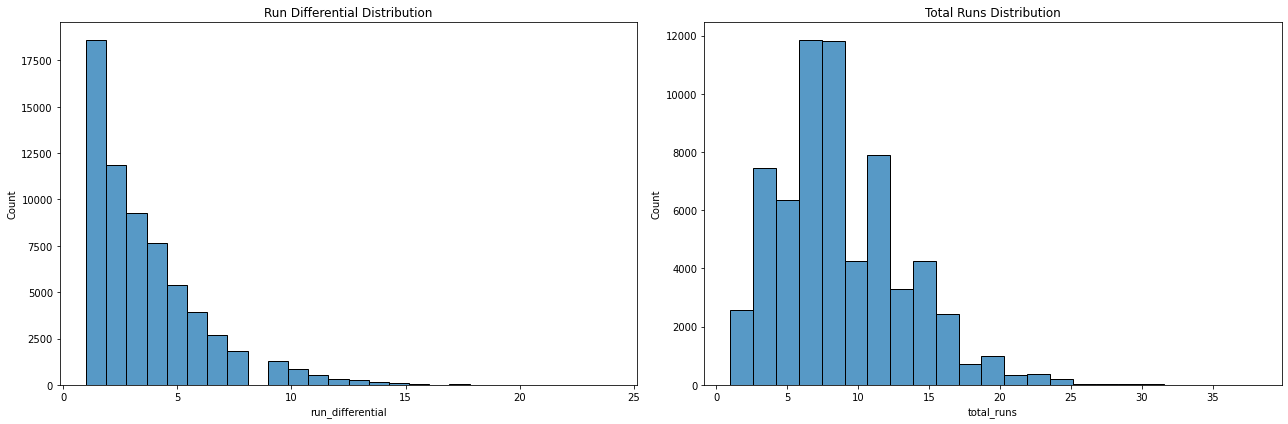

In [88]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Bar plot of 'rbi'
sns.histplot(combo_df['run_differential'], bins=26, ax=axes[0])
axes[0].set_title('Run Differential Distribution')

# Plot 2: Histogram of 'runs'
sns.histplot(combo_df['total_runs'], bins=23, ax=axes[1])
axes[1].set_title('Total Runs Distribution')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

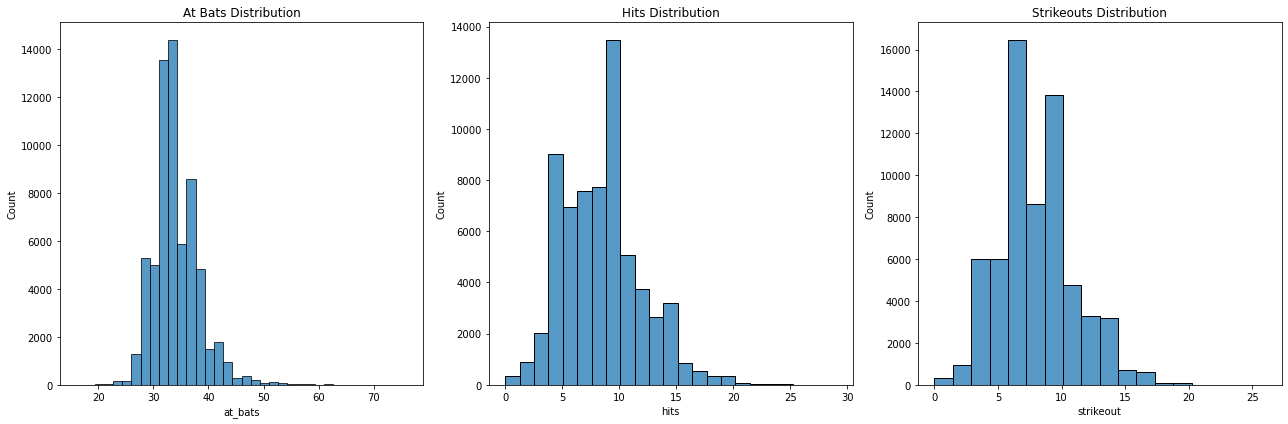

In [89]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Bar plot of 'rbi'
sns.histplot(combo_df['at_bats'], bins=36, ax=axes[0])
axes[0].set_title('At Bats Distribution')

# Plot 2: Histogram of 'runs'
sns.histplot(combo_df['hits'], bins=23, ax=axes[1])
axes[1].set_title('Hits Distribution')

# Plot 3: Histogram of 'hits'
sns.histplot(combo_df['strikeout'], bins=18, ax=axes[2])
axes[2].set_title('Strikeouts Distribution')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

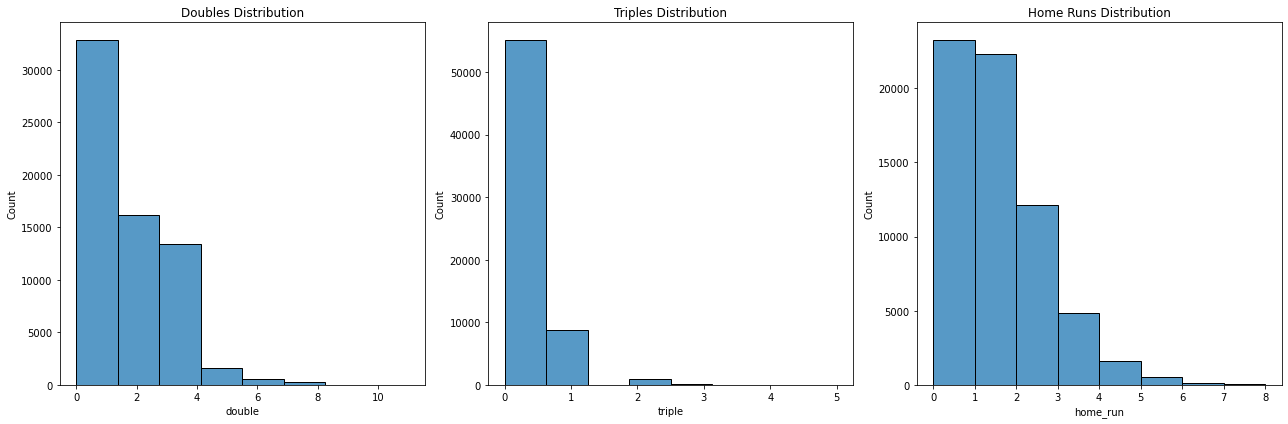

In [90]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Bar plot of 'rbi'
sns.histplot(combo_df['double'], bins=8, ax=axes[0])
axes[0].set_title('Doubles Distribution')

# Plot 2: Histogram of 'runs'
sns.histplot(combo_df['triple'], bins=8, ax=axes[1])
axes[1].set_title('Triples Distribution')

# Plot 3: Histogram of 'hits'
sns.histplot(combo_df['home_run'], bins=8, ax=axes[2])
axes[2].set_title('Home Runs Distribution')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

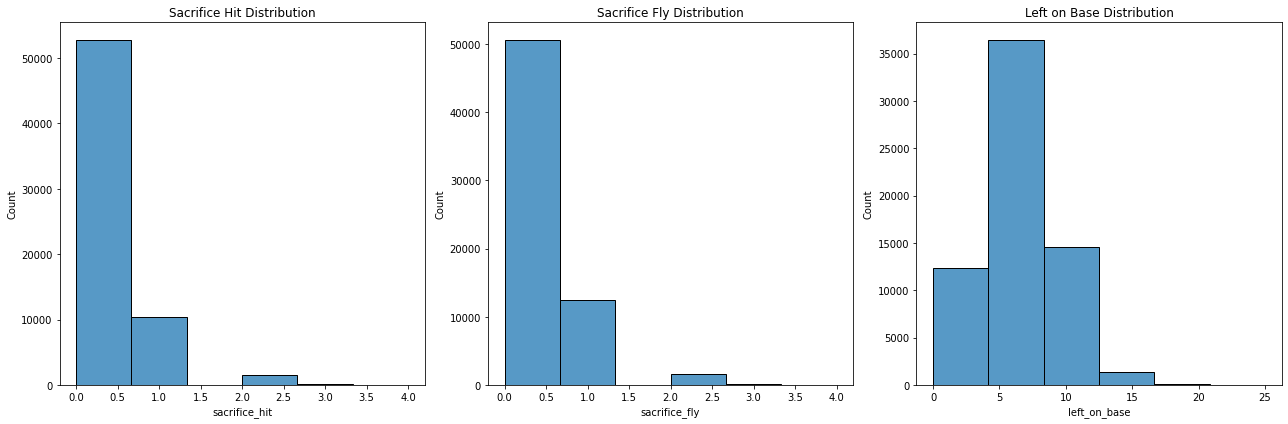

In [91]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Bar plot of 'rbi'
sns.histplot(combo_df['sacrifice_hit'], bins=6, ax=axes[0])
axes[0].set_title('Sacrifice Hit Distribution')

# Plot 2: Histogram of 'runs'
sns.histplot(combo_df['sacrifice_fly'], bins=6, ax=axes[1])
axes[1].set_title('Sacrifice Fly Distribution')

# Plot 3: Histogram of 'hits'
sns.histplot(combo_df['left_on_base'], bins=6, ax=axes[2])
axes[2].set_title('Left on Base Distribution')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

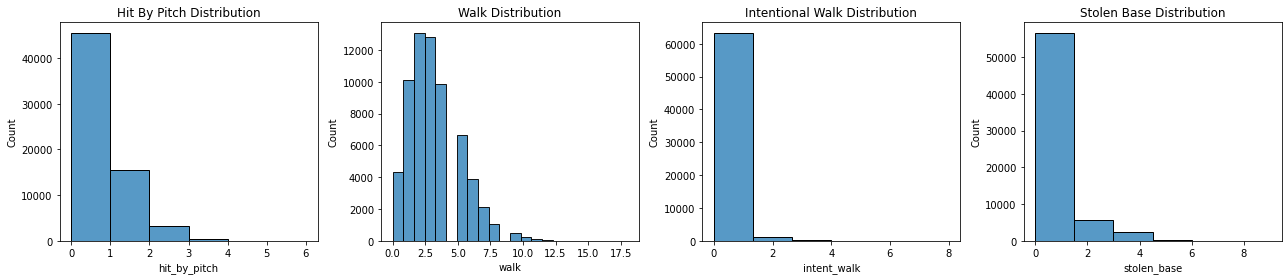

In [92]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

# Plot 1: Bar plot of 'rbi'
sns.histplot(combo_df['hit_by_pitch'], bins=6, ax=axes[0])
axes[0].set_title('Hit By Pitch Distribution')

# Plot 2: Histogram of 'runs'
sns.histplot(combo_df['walk'], bins=22, ax=axes[1])
axes[1].set_title('Walk Distribution')

# Plot 3: Histogram of 'hits'
sns.histplot(combo_df['intent_walk'], bins=6, ax=axes[2])
axes[2].set_title('Intentional Walk Distribution')

# Plot 4: Histogram of 'hits'
sns.histplot(combo_df['stolen_base'], bins=6, ax=axes[3])
axes[3].set_title('Stolen Base Distribution')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

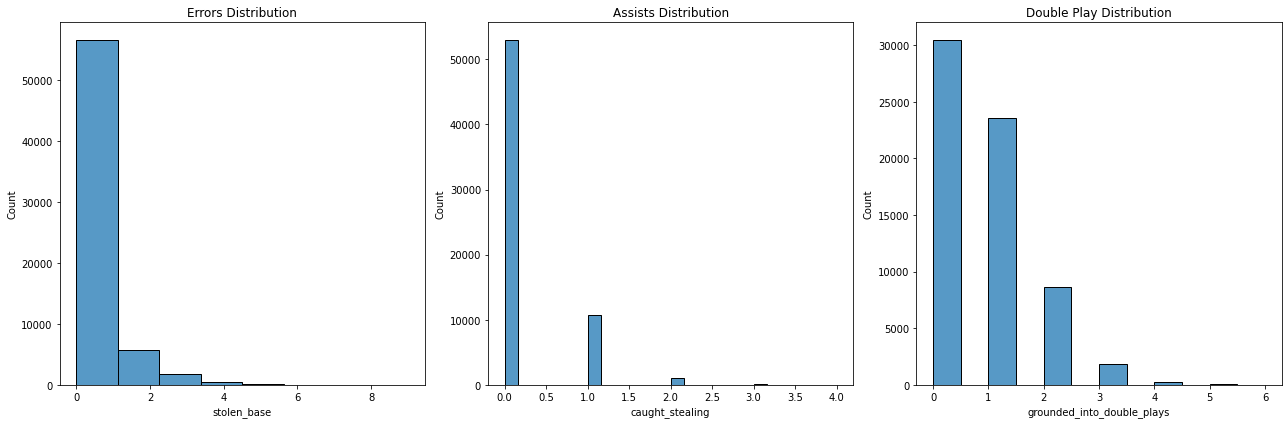

In [93]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Bar plot of 'rbi'
sns.histplot(combo_df['stolen_base'], bins=8, ax=axes[0])
axes[0].set_title('Errors Distribution')

# Plot 2: Histogram of 'runs'
sns.histplot(combo_df['caught_stealing'], bins=24, ax=axes[1])
axes[1].set_title('Assists Distribution')

# Plot 3: Histogram of 'hits'
sns.histplot(combo_df['grounded_into_double_plays'], bins=12, ax=axes[2])
axes[2].set_title('Double Play Distribution')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

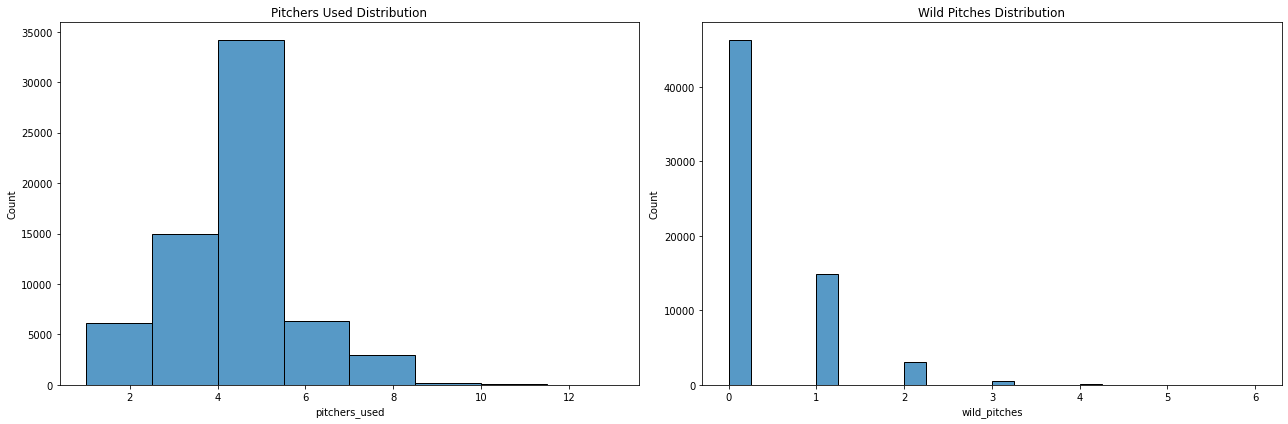

In [94]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Bar plot of 'rbi'
sns.histplot(combo_df['pitchers_used'], bins=8, ax=axes[0])
axes[0].set_title('Pitchers Used Distribution')

# Plot 2: Histogram of 'runs'
sns.histplot(combo_df['wild_pitches'], bins=24, ax=axes[1])
axes[1].set_title('Wild Pitches Distribution')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

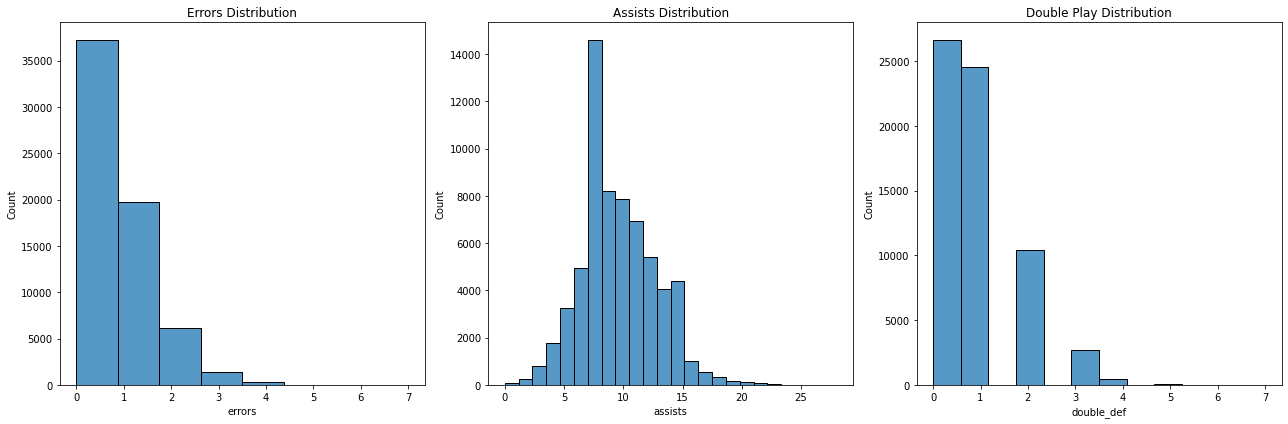

In [95]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Bar plot of 'rbi'
sns.histplot(combo_df['errors'], bins=8, ax=axes[0])
axes[0].set_title('Errors Distribution')

# Plot 2: Histogram of 'runs'
sns.histplot(combo_df['assists'], bins=24, ax=axes[1])
axes[1].set_title('Assists Distribution')

# Plot 3: Histogram of 'hits'
sns.histplot(combo_df['double_def'], bins=12, ax=axes[2])
axes[2].set_title('Double Play Distribution')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

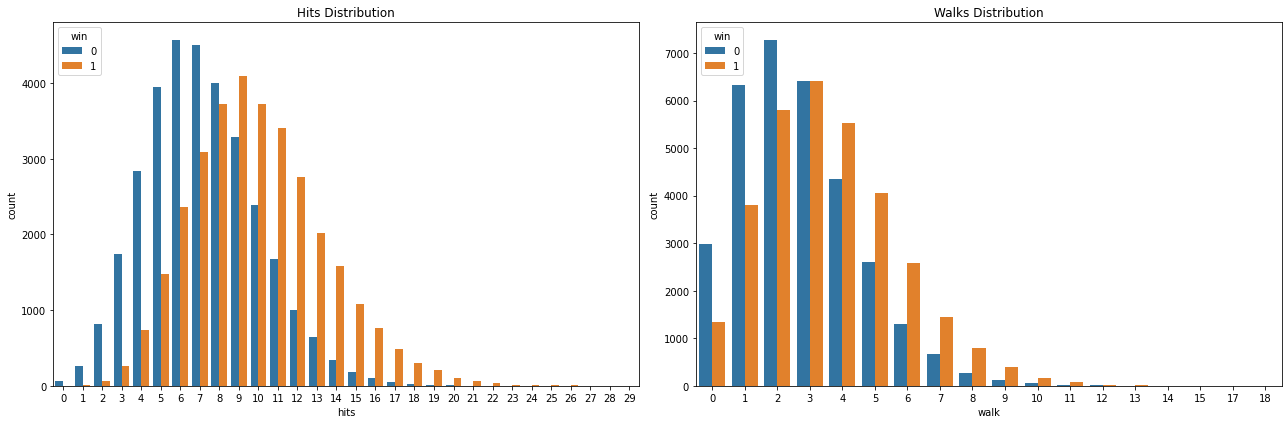

In [96]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Stacked bar chart of 'at_bats' with 'win'
#sns.countplot(x='at_bats', hue='win', data=combo_df, ax=axes[0])
#axes[0].set_title('At Bats Distribution')

# Plot 2: Stacked bar chart of 'hits' with 'win'
sns.countplot(x='hits', hue='win', data=combo_df, ax=axes[0])
axes[0].set_title('Hits Distribution')

# Plot 3: Stacked bar chart of 'walk' with 'win'
sns.countplot(x='walk', hue='win', data=combo_df, ax=axes[1])
axes[1].set_title('Walks Distribution')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

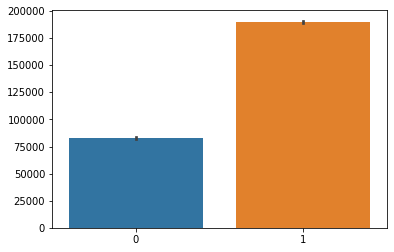

In [97]:
sns.barplot(x='win', y='rbi', data=combo_df, estimator=sum)

# Add labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('')

# Rotate x-axis labels for better readability if needed
plt.xticks()

# Show plot
plt.show()

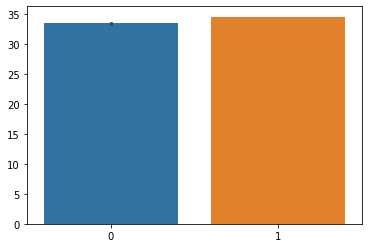

In [98]:
sns.barplot(x='win', y='at_bats', data=combo_df)

# Add labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('')

# Rotate x-axis labels for better readability if needed
plt.xticks()

# Show plot
plt.show();

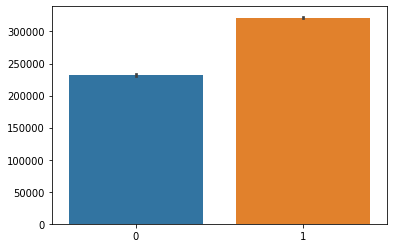

In [99]:
sns.barplot(x='win', y='hits', data=combo_df, estimator=sum)

# Add labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('')

# Rotate x-axis labels for better readability if needed
plt.xticks()

# Show plot
plt.show()

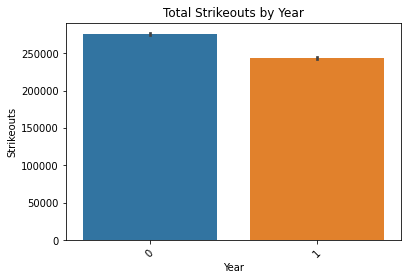

In [100]:
sns.barplot(x='win', y='strikeout', data=combo_df, estimator=sum)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Strikeouts')
plt.title('Total Strikeouts by Year')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show plot
plt.show()

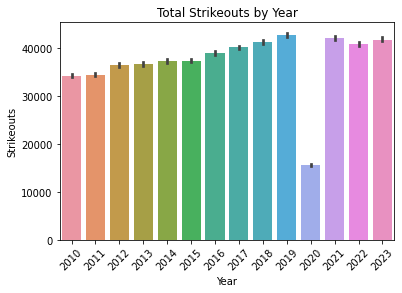

In [101]:
sns.barplot(x='year', y='strikeout', data=combo_df, estimator=sum)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Strikeouts')
plt.title('Total Strikeouts by Year')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show plot
plt.show()

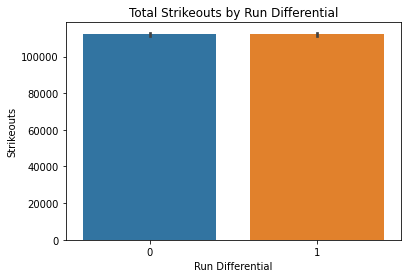

In [102]:
sns.barplot(x='win', y='run_differential', data=combo_df, estimator=sum)

# Add labels and title
plt.xlabel('Run Differential')
plt.ylabel('Strikeouts')
plt.title('Total Strikeouts by Run Differential')

# Rotate x-axis labels for better readability if needed
plt.xticks()

# Show plot
plt.show()

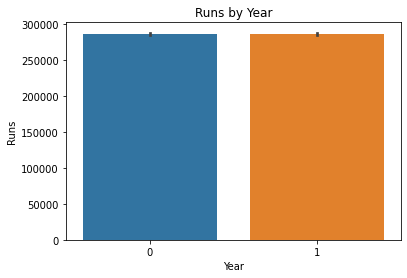

In [103]:
# Runs by Year
sns.barplot(x='win', y='total_runs', data=combo_df, estimator=sum)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Runs')
plt.title('Runs by Year')

# Rotate x-axis labels for better readability if needed
plt.xticks()

# Show plot
plt.show()

In [104]:
combo_df['total_runs'] = pd.to_numeric(df['total_runs'])
df_sorted = combo_df.sort_values(by='total_runs', ascending=False)

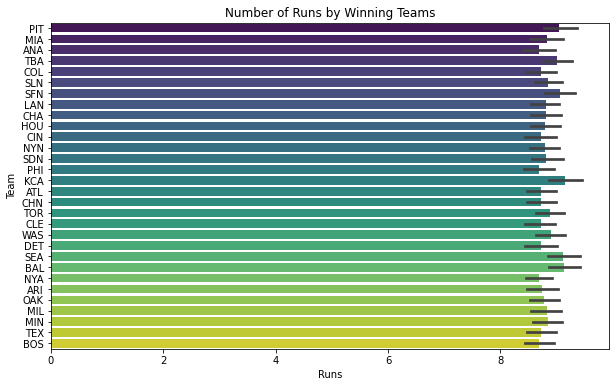

In [105]:
# Sort the DataFrame by total_runs in descending order

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='total_runs', y='winning_team', data=df_sorted, palette='viridis')
plt.xlabel('Runs')
plt.ylabel('Team')
plt.title('Number of Runs by Winning Teams')
plt.show()

In [106]:
#consider chi2 for further EDA?


In [107]:
combo_df.head()

,date,team_visiting,team_home,score_visiting,score_home,outs_in_game,at_bats,hits,double,triple,home_run,rbi,sacrifice_hit,sacrifice_fly,hit_by_pitch,walk,intent_walk,strikeout,stolen_base,caught_stealing,grounded_into_double_plays,first_catcher_interfere,left_on_base,pitchers_used,individual_earned_runs,team_earned_runs,wild_pitches,balks,putouts,assists,errors,passed_balls,double_def,triple_def,year,losing_team,winning_team,run_differential,total_runs,ID,win,obp
0,20100404,NYA,BOS,7,9,51,34.0,12,3.0,1.0,1,8,0,1,0,4,0,5,0,0,0,0,6,6,7,7,1,0,27,15,0,0,2,0,2010,NYA,BOS,2,16.0,1,1,0.410256
1,20100405,MIN,ANA,3,6,51,33.0,9,0.0,0.0,3,6,0,0,0,3,0,5,1,0,0,0,6,4,3,3,0,0,27,10,0,0,1,0,2010,MIN,ANA,3,9.0,2,1,0.333333
2,20100405,CLE,CHA,0,6,51,28.0,6,2.0,0.0,2,4,0,0,2,5,0,4,0,1,1,0,5,3,0,0,0,0,27,9,0,0,1,0,2010,CLE,CHA,6,6.0,3,1,0.371429
3,20100405,TOR,TEX,4,5,52,31.0,6,2.0,0.0,1,5,0,0,1,2,1,7,0,0,1,0,4,4,4,4,0,0,27,6,1,0,1,0,2010,TOR,TEX,1,12.0,6,1,0.264706
4,20100405,SDN,ARI,3,6,51,33.0,8,0.0,0.0,2,6,0,0,0,3,0,8,1,0,1,0,6,3,3,3,0,0,27,10,0,0,0,0,2010,SDN,ARI,3,8.0,7,1,0.305556


In [108]:
# Group by Game_ID
grouped = combo_df.groupby('ID')

# Convert groups to a list of DataFrames
game_list = [group for _, group in grouped]

# Perform train-test split on the list of games
train_games, test_games = train_test_split(game_list, test_size=0.2, random_state=13)

# Concatenate the DataFrames back into train and test sets
train_df = pd.concat(train_games).reset_index(drop=True)
test_df = pd.concat(test_games).reset_index(drop=True)

In [109]:
train_df.head()

,date,team_visiting,team_home,score_visiting,score_home,outs_in_game,at_bats,hits,double,triple,home_run,rbi,sacrifice_hit,sacrifice_fly,hit_by_pitch,walk,intent_walk,strikeout,stolen_base,caught_stealing,grounded_into_double_plays,first_catcher_interfere,left_on_base,pitchers_used,individual_earned_runs,team_earned_runs,wild_pitches,balks,putouts,assists,errors,passed_balls,double_def,triple_def,year,losing_team,winning_team,run_differential,total_runs,ID,win,obp
0,20110406,OAK,TOR,3,5,51,32.0,11,2.0,1.0,1,5,0,0,0,1,0,4,0,1,1,0,4,3,3,3,1,0,27,11,0,0,0,0,2011,OAK,TOR,2,7.0,2505,1,0.363636
1,20110406,OAK,TOR,3,5,51,32.0,6,2.0,1.0,0,3,0,0,0,2,0,10,0,1,0,0,4,2,5,5,0,0,24,11,0,0,1,0,2011,OAK,TOR,2,NaN,2505,0,0.235294
2,20190630,ARI,SFN,4,10,51,35.0,13,4.0,0.0,1,10,0,1,0,6,0,10,0,0,1,0,8,3,4,4,0,0,27,8,0,0,0,0,2019,ARI,SFN,6,7.0,23083,1,0.452381
3,20190630,ARI,SFN,4,10,51,34.0,8,1.0,1.0,0,4,0,1,0,2,0,11,0,0,0,0,6,5,10,10,0,0,24,8,1,0,1,0,2019,ARI,SFN,6,NaN,23083,0,0.270270
4,20210608,ATL,PHI,9,5,54,35.0,11,1.0,0.0,2,5,1,0,0,6,0,4,0,0,2,0,10,6,6,6,0,0,27,11,2,0,2,0,2021,PHI,ATL,4,13.0,26045,0,0.414634


In [110]:
X_train= train_df[[
   'at_bats',
   'hits',
   'double',
   'triple',
   'home_run',
   'sacrifice_hit',
   'sacrifice_fly',
   'hit_by_pitch',
   'walk',
   'intent_walk',
   'strikeout',
   'stolen_base',
   'caught_stealing',
   'grounded_into_double_plays',
   'left_on_base',
   'pitchers_used',
   'wild_pitches',
   'assists',
   'errors',
   'double_def'
   ]]

y_train= train_df['win']

X_test= test_df[[
   'at_bats',
   'hits',
   'double',
   'triple',
   'home_run',
   'sacrifice_hit',
   'sacrifice_fly',
   'hit_by_pitch',
   'walk',
   'intent_walk',
   'strikeout',
   'stolen_base',
   'caught_stealing',
   'grounded_into_double_plays',
   'left_on_base',
   'pitchers_used',
   'wild_pitches',
   'assists',
   'errors',
   'double_def'
   ]]

y_test= test_df['win']

#### Preprocessing

In [111]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
'''
ohe = OneHotEncoder(sparse=False)

ohe.fit(X_train_scaled)

X_train_encoded = pd.DataFrame(ohe.transrom(X_train_scaled).todense(),
                              columns = ohe.get_feature_names_out())

X_train_encoded.info()
'''

'\nohe = OneHotEncoder(sparse=False)\n\nohe.fit(X_train_scaled)\n\nX_train_encoded = pd.DataFrame(ohe.transrom(X_train_scaled).todense(),\n                              columns = ohe.get_feature_names_out())\n\nX_train_encoded.info()\n'

#### Baseline (Dummy) Model

In [113]:
# Instantiate the model
dummy_model = DummyClassifier(strategy="most_frequent")

# fitting the model to our newly encoded dataset
dummy_model.fit(X_train_scaled, y_train)

# predicting the first 10
dummy_model.predict(X_train_scaled)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [114]:
# checking the ratio of 1 to 0 in our training set
# Would a baseline model be this outcome? 
# If I were to guess the outcome of any game with these data I would have a 50/50 chance? 
# Half of the rows in these data are win and half are lose.
print(y_train.value_counts(normalize=True))

1    0.5
0    0.5
Name: win, dtype: float64


In [115]:
#FSM would be a dummy classifier?
# Need clarificaiton btn dummy classifier, FSM, and baseline model

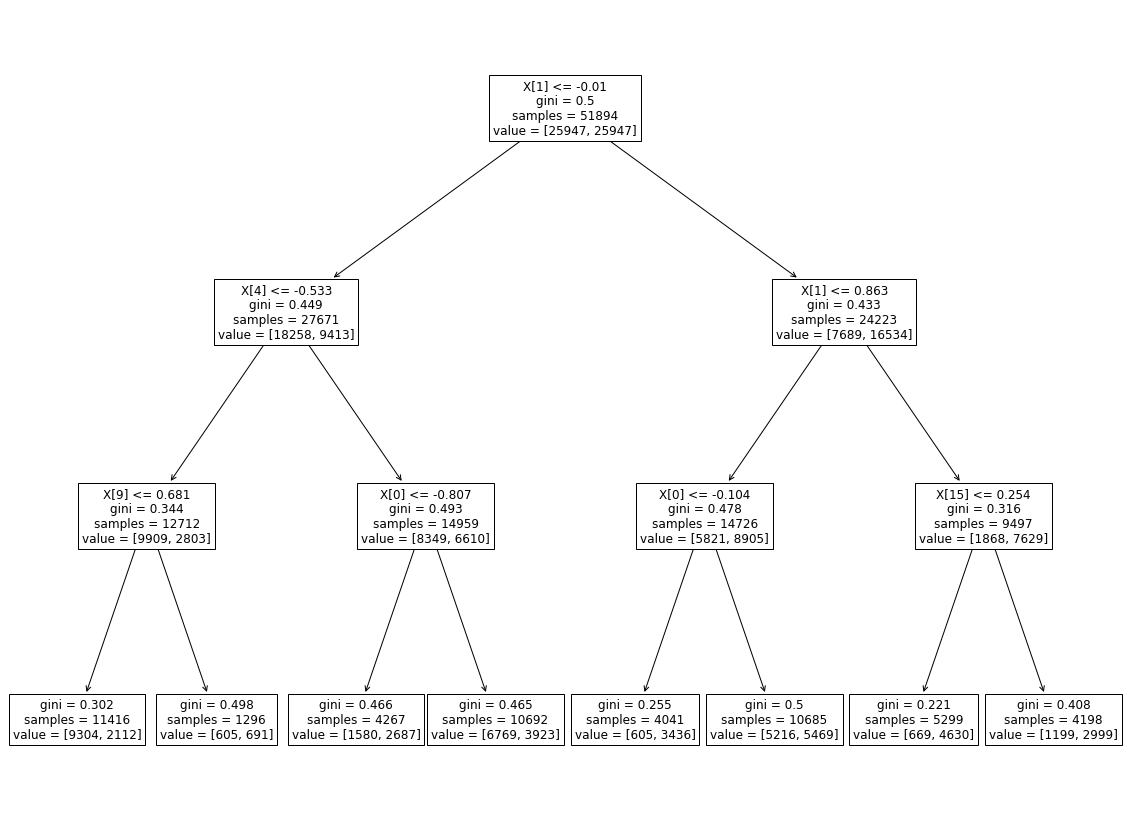

In [116]:
# instantiate tree
tree = DecisionTreeClassifier(max_depth=3, random_state=13)

# fit to our training set
tree.fit(X_train_scaled, y_train)

# plotting the figure
plt.figure(figsize=(20,15))  # set plot size (denoted in inches)
plot_tree(tree, fontsize=12)
plt.show();

In [140]:
# instantiating the model
logreg = LogisticRegression(random_state=13)

# fitting the model to our scaled training set
logreg.fit(X_train_scaled, y_train)


LogisticRegression(random_state=13)

In [141]:
# predicting our target
y_pred = logreg.predict(X_test_scaled)
y_pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [146]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.798


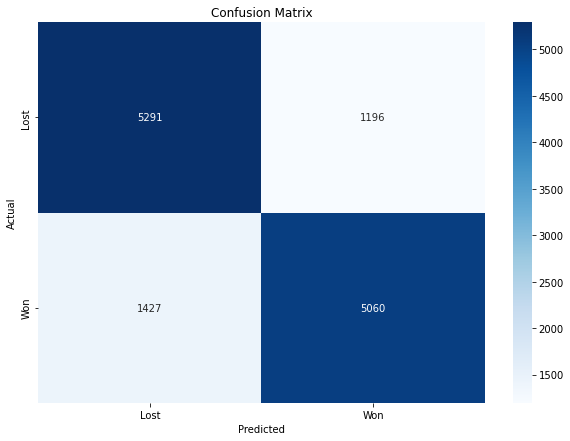

In [143]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [135]:
# printing out a full classification report to check precision and recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      6487
           1       0.81      0.78      0.79      6487

    accuracy                           0.80     12974
   macro avg       0.80      0.80      0.80     12974
weighted avg       0.80      0.80      0.80     12974



In [122]:
'''
# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
'''

'\n# Initialize and train the model\nmodel = RandomForestClassifier(random_state=42)\nmodel.fit(X_train, y_train)\n\n# Predict on the test set\ny_pred = model.predict(X_test)\n\n# Evaluate the model\naccuracy = accuracy_score(y_test, y_pred)\nprint("Accuracy:", accuracy)\n'

In [123]:

#model_log1 = LogisticRegression(random_state=13)
#model_log1.fit(X_train_ss, y_train)

### Neural Network

In [124]:
X = X_train_scaled
y = y_train

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Create a TensorDataset and DataLoader
dataset = TensorDataset(X_tensor, y_tensor)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

In [125]:
# Print to verify
for data in dataloader:
    inputs, labels = data
    print("Batch of inputs:\n", inputs)
    print("Batch of labels:\n", labels)
    break  # Print only the first batch for brevity

Batch of inputs:
 tensor([[ 0.4818,  0.7177,  0.9503, -0.3978, -0.9777,  1.6494,  1.4871,  1.0130,
          1.4192, -0.3967, -1.3452,  1.6404, -0.4504, -0.8817,  2.7326, -0.8353,
         -0.5644,  0.1649, -0.7294, -0.9605],
        [-0.2210,  0.1359,  0.2215,  1.9856, -0.9777, -0.4450,  1.4871,  1.0130,
          0.4295, -0.3967,  0.3299,  1.6404, -0.4504,  1.5187,  0.0697,  0.6171,
          1.0341,  0.1649, -0.7294, -0.9605],
        [-0.4552, -0.7367, -1.2359, -0.3978, -0.0877, -0.4450, -0.4946,  1.0130,
         -0.0654, -0.3967,  0.6650, -0.6360, -0.4504,  0.3185,  0.4501,  0.6171,
         -0.5644, -0.7878,  0.5312,  0.1572],
        [-1.1580, -1.0276, -1.2359, -0.3978, -0.9777, -0.4450, -0.4946, -0.5862,
         -0.0654, -0.3967, -0.0051, -0.6360, -0.4504,  2.7189, -0.6911, -0.8353,
          2.6326, -0.7878,  0.5312, -0.9605],
        [-0.9237, -0.1549,  0.2215,  1.9856, -0.9777, -0.4450, -0.4946,  1.0130,
         -0.5603, -0.3967, -1.0102, -0.6360, -0.4504,  1.5187, -1.071

In [126]:
# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(20, 50)  # Adjust input size if necessary
        self.fc2 = nn.Linear(50, 2)   # Assuming binary classification (2 output classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(dataloader)}")

# Evaluate the model on the test set
model.eval()
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f"Accuracy: {accuracy * 100:.2f}%")

Epoch 1, Loss: 0.43044253490104384
Epoch 2, Loss: 0.39533253861142603
Epoch 3, Loss: 0.38716210890381897
Epoch 4, Loss: 0.3797182366015077
Epoch 5, Loss: 0.37084475454833066
Epoch 6, Loss: 0.3616666478178462
Epoch 7, Loss: 0.35779506619768453
Epoch 8, Loss: 0.35554611420398846
Epoch 9, Loss: 0.3543414849231669
Epoch 10, Loss: 0.35362332991480483
Epoch 11, Loss: 0.35280506873506917
Epoch 12, Loss: 0.35214015037747304
Epoch 13, Loss: 0.3514764331650843
Epoch 14, Loss: 0.35084308617118465
Epoch 15, Loss: 0.35069000245303433
Epoch 16, Loss: 0.35050184918650085
Epoch 17, Loss: 0.3495553413519065
Epoch 18, Loss: 0.34910313578175384
Epoch 19, Loss: 0.3486248043762351
Epoch 20, Loss: 0.34888150159535153
Accuracy: 83.26%


In [127]:
importances = model.fc1.weight.detach().numpy()
feature_importance = np.mean(np.abs(importances), axis=0)
print("Feature Importances:")
for name, importance in zip(X_train.columns, feature_importance):
    print(f"{name}: {importance}")

Feature Importances:
at_bats: 0.598639726638794
hits: 0.42145174741744995
double: 0.1506182700395584
triple: 0.16066661477088928
home_run: 0.18715955317020416
sacrifice_hit: 0.18871775269508362
sacrifice_fly: 0.17389139533042908
hit_by_pitch: 0.15520291030406952
walk: 0.29533347487449646
intent_walk: 0.19323410093784332
strikeout: 0.13382872939109802
stolen_base: 0.15422528982162476
caught_stealing: 0.1459539383649826
grounded_into_double_plays: 0.17882531881332397
left_on_base: 0.39015236496925354
pitchers_used: 0.2669103741645813
wild_pitches: 0.12053513526916504
assists: 0.13019809126853943
errors: 0.14897646009922028
double_def: 0.14875800907611847


In [128]:
# Extract feature importances from the first layer of the model
importances = model.fc1.weight.detach().numpy()

# Calculate the mean absolute importance for each feature
feature_importance = np.mean(np.abs(importances), axis=0)

# Create a list of (feature_name, importance) tuples
feature_importance_tuples = [(name, importance) for name, importance in zip(X_train.columns, feature_importance)]

# Sort the list of tuples by importance in descending order
sorted_feature_importance = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
print("Feature Importances (most to least important):")
for name, importance in sorted_feature_importance:
    print(f"{name}: {importance:.4f}")

Feature Importances (most to least important):
at_bats: 0.5986
hits: 0.4215
left_on_base: 0.3902
walk: 0.2953
pitchers_used: 0.2669
intent_walk: 0.1932
sacrifice_hit: 0.1887
home_run: 0.1872
grounded_into_double_plays: 0.1788
sacrifice_fly: 0.1739
triple: 0.1607
hit_by_pitch: 0.1552
stolen_base: 0.1542
double: 0.1506
errors: 0.1490
double_def: 0.1488
caught_stealing: 0.1460
strikeout: 0.1338
assists: 0.1302
wild_pitches: 0.1205


In [129]:
#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

#### Notes - Working

Consider parsing line score per inning - runs per inning
Some floats should be integers (no decimals needed); consider cleaning up

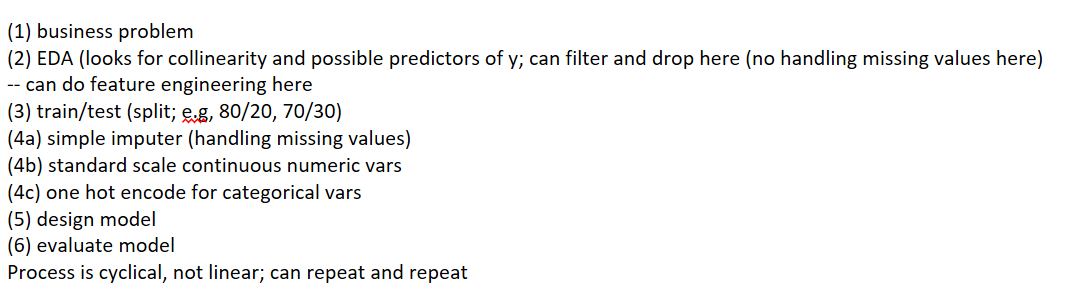


- WAR stat
- Sabermetrics/Billy Beane/defense
- Athletics - move to Vegas?
- How to build a park? How to build a team for your park , e.g. left handed pull hitters for Yankee stadium - have a short right field porch/fence; CO the ball travels further so they have a huge outfield - so need fast players to cover the ground.
- Which parks see the most home runs - holding xyz factors constant
- Mental fortitude as a factor/clutch performance

In [130]:
from notebook.services.config import ConfigManager

# Get the notebook server's configuration
cm = ConfigManager()

# Update the IOPub data rate limit
cm.update('NotebookApp', {'iopub_data_rate_limit': 2000000})

{'iopub_data_rate_limit': 2000000}